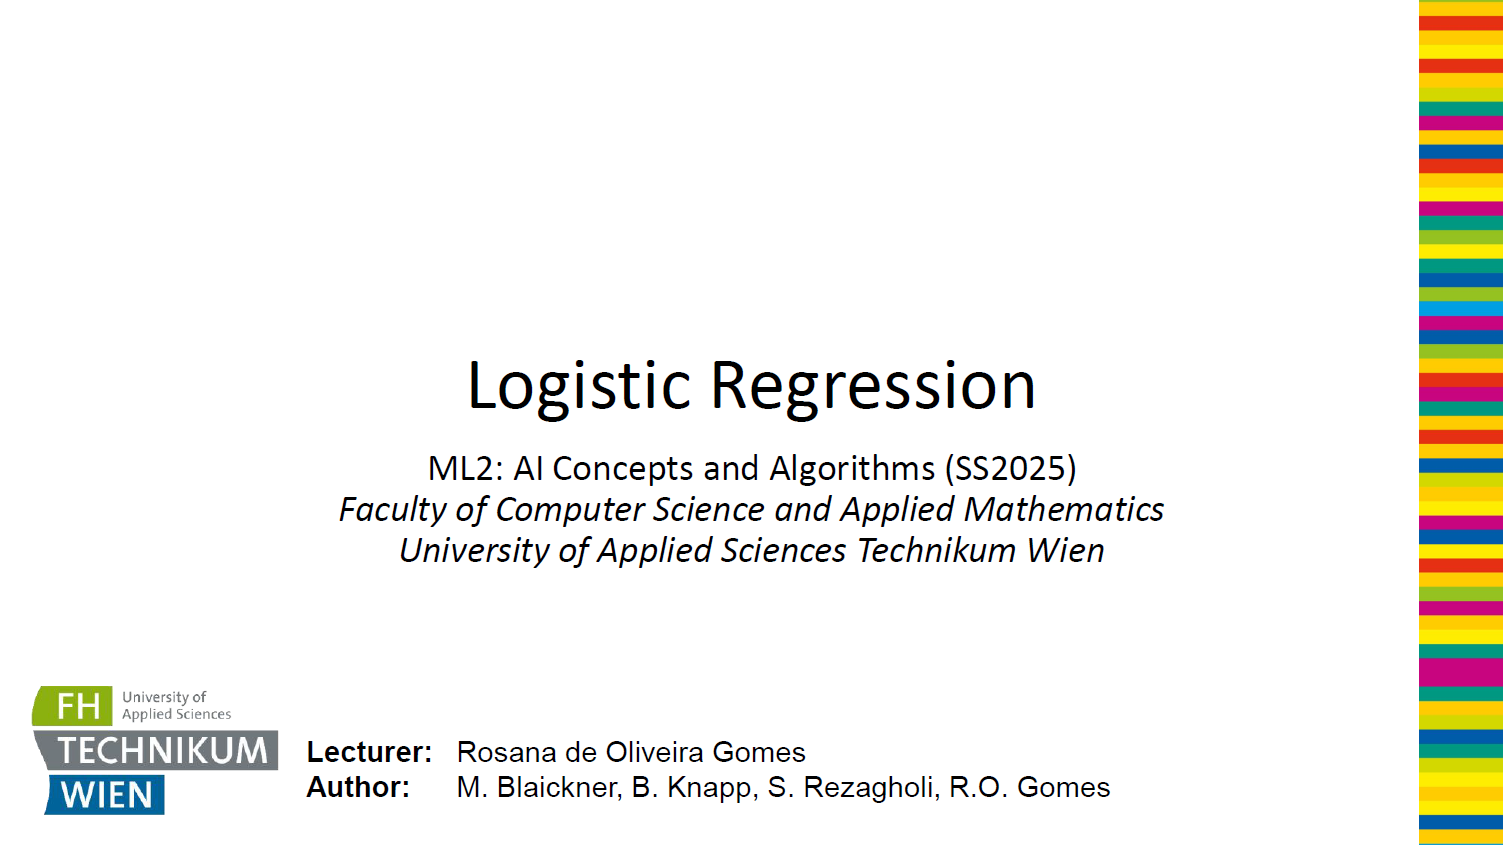

Welcome to today’s lecture on **Logistic Regression**, part of the course *ML2: AI Concepts and Algorithms (SS2025)* at the University of Applied Sciences Technikum Wien.

This lecture is brought to you by the Faculty of Computer Science and Applied Mathematics. Our guiding lecturer is **Rosana de Oliveira Gomes**, and the material was prepared in collaboration with **M. Blaickner, B. Knapp, S. Rezagholi**, and Prof. Gomes.

Today, we’ll delve into one of the most widely used classification algorithms in machine learning — logistic regression — and understand how it allows us to model probabilities and make discrete predictions.

Let’s begin with the next slide. Please go ahead.


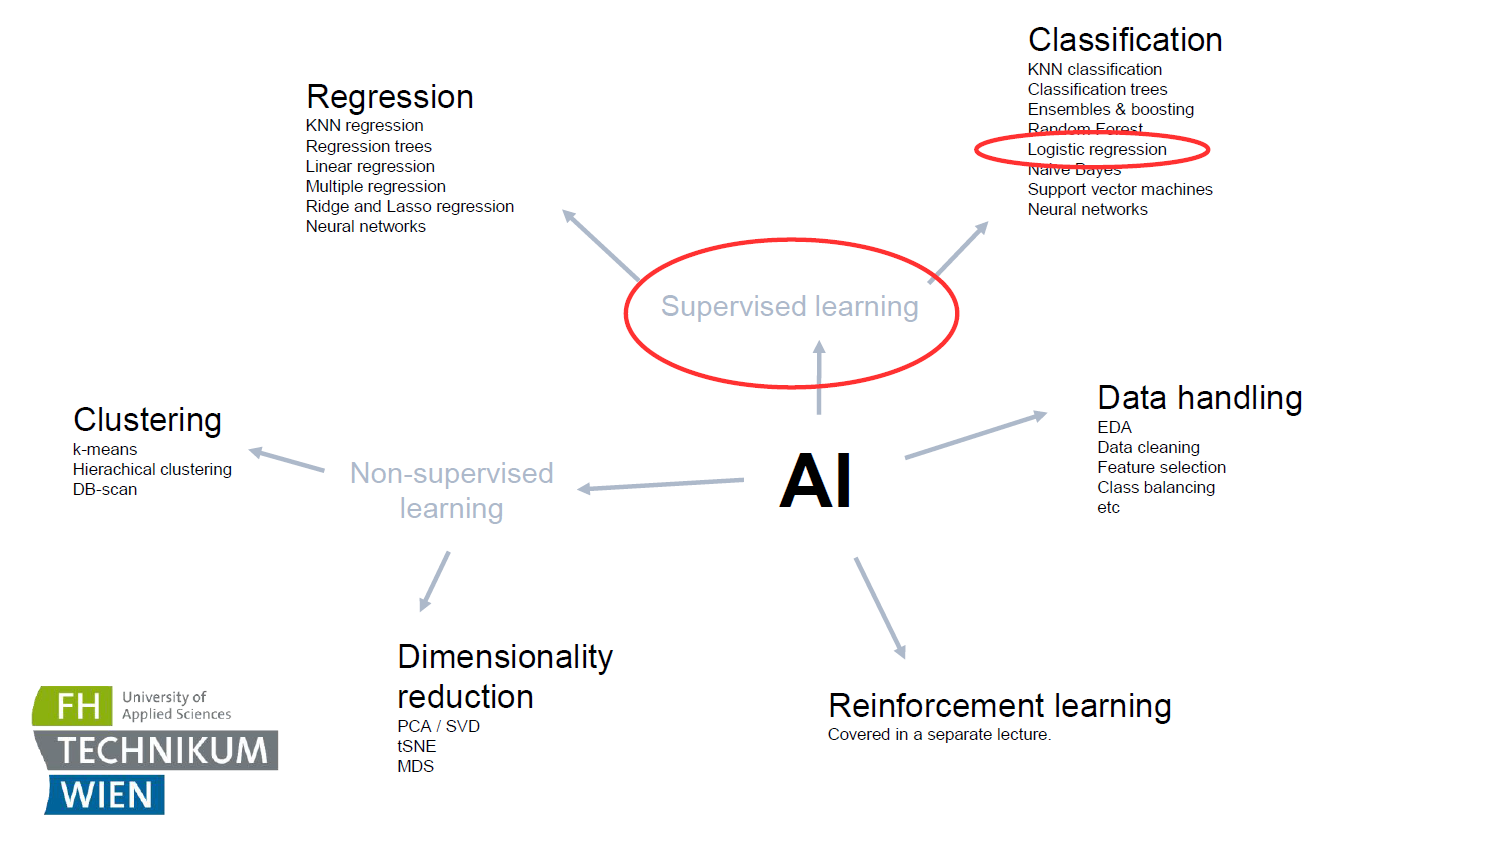

📍\*\*\[Slide 2 – Framing Logistic Regression in AI]\*\*

To understand logistic regression in context, let’s first look at the broader landscape of **Artificial Intelligence**.

At the heart of AI, we distinguish two primary learning paradigms:

* **Supervised Learning**, where models are trained on labeled data
* **Non-Supervised Learning**, where labels are not provided

➡️ **Logistic Regression** is a *supervised learning* technique used under the **Classification** umbrella.

On the right, you’ll see it listed alongside other classification techniques like:

* k-Nearest Neighbors (kNN)
* Decision Trees
* Ensemble Methods (like boosting)
* Support Vector Machines (SVMs)
* Neural Networks

Each of these has strengths depending on the dataset and task. Logistic regression stands out for its simplicity, interpretability, and effectiveness for binary classification tasks.

You’ll also notice other key areas in the AI ecosystem:

* **Regression**, also under supervised learning
* **Clustering** and **Dimensionality Reduction**, both part of unsupervised learning
* **Reinforcement Learning**, addressed separately
* And of course, essential **Data Handling** processes that underpin all ML workflows

This diagram gives us a clear orientation: today, our focus is on one small but powerful tool in the AI arsenal — **Logistic Regression**.

Let’s proceed to the next slide.


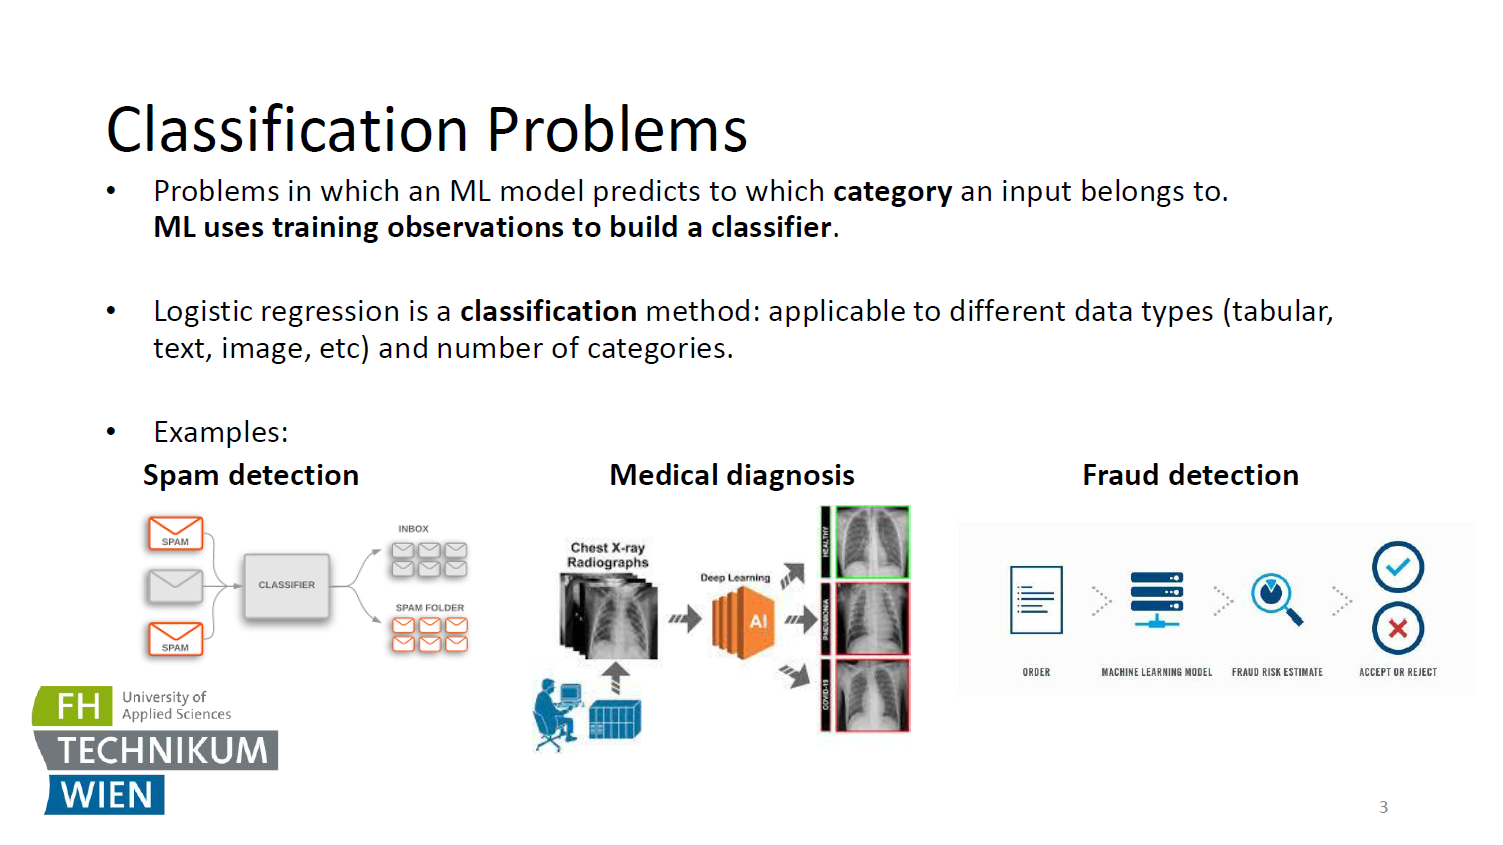

📍\*\*\[Slide 3 – Classification Problems]\*\*

Let’s begin by understanding the **type of problem** that logistic regression is designed to solve: **classification**.

🔹 **Classification Problems** involve predicting **which category** an input belongs to.
For example: *Is this email spam or not? Does this patient have a disease or not?*
Machine learning builds a **classifier** using labeled training data.

🔹 **Logistic Regression** is one of the core methods used in classification.
It is:

* Versatile — works with **tabular, text, image**, or other data types.
* Scalable — suitable for both **binary** and **multiclass** classification tasks.

Let’s look at three real-world **examples**:

* 📬 **Spam detection**: classifies messages into "spam" or "not spam".
* 🏥 **Medical diagnosis**: detects whether X-ray images show signs of disease.
* 💳 **Fraud detection**: identifies transactions that may be fraudulent.

In all these cases, the model outputs a **probability** that an instance belongs to a certain class — and logistic regression gives us a mathematically sound way to calculate that.

Let’s continue to the next slide.


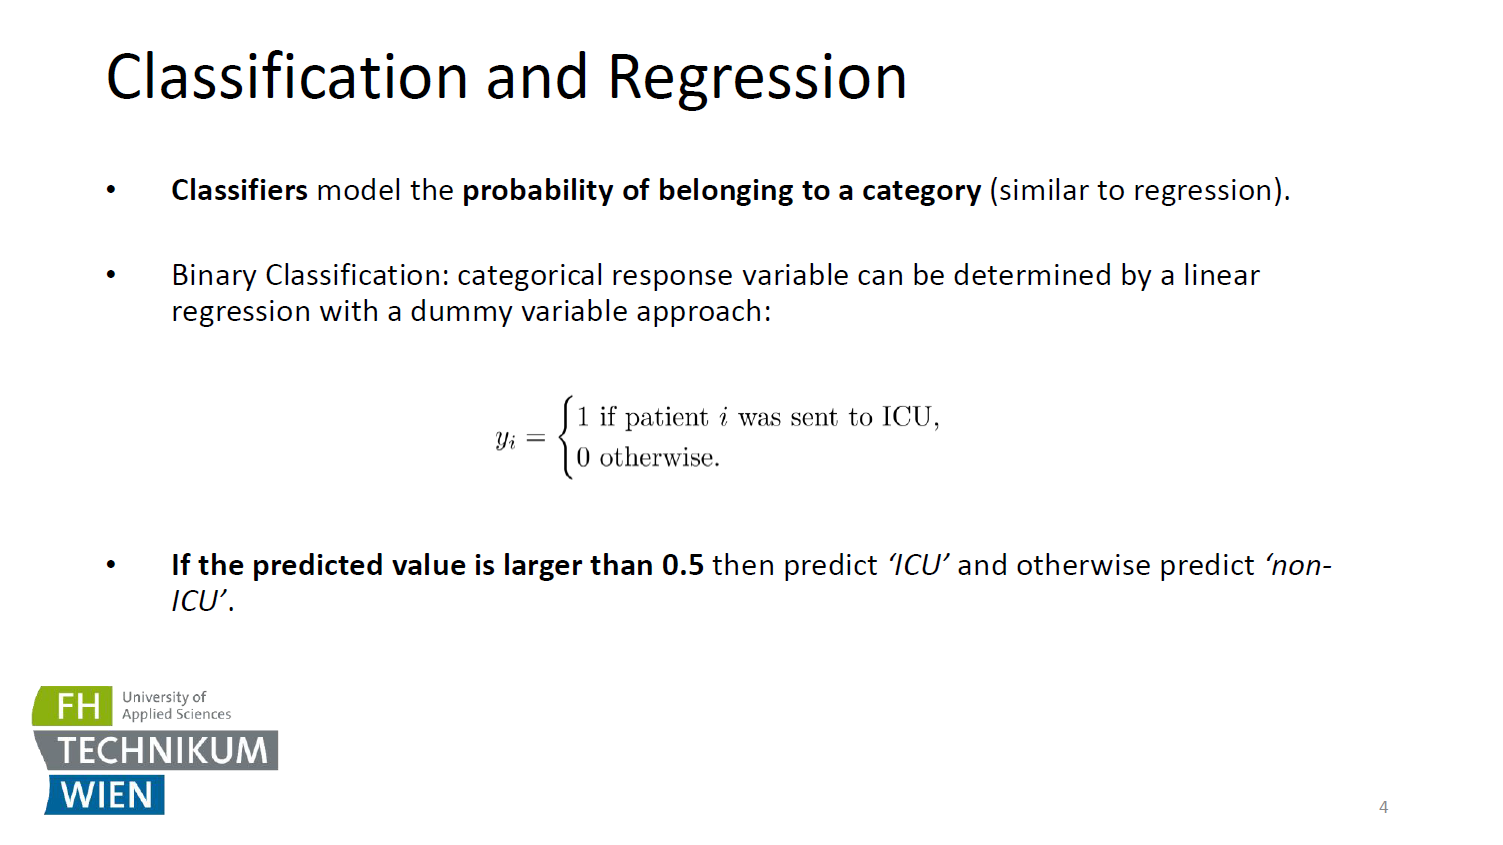

📍\*\*\[Slide 4 – Classification and Regression]\*\*

Now let’s clarify the connection — and key difference — between **classification** and **regression**.

🔸 Both classification and regression aim to **predict an outcome**.
But in classification, the outcome is **categorical** (e.g., ICU or not), while in regression it’s **continuous** (like predicting blood pressure or temperature).

---

Let’s focus on a **binary classification** scenario:
Suppose we want to predict whether a patient was sent to the ICU.
We can define our response variable $y_i$ as:

$$
y_i = 
\begin{cases}
1 & \text{if patient } i \text{ was sent to ICU} \\
0 & \text{otherwise}
\end{cases}
$$

This is known as a **dummy variable approach** — assigning numeric values to categories.

---

Now, if we applied **linear regression** here, we could technically get a predicted value between 0 and 1 (or even outside that range!).
And then, by applying a **threshold** (say 0.5), we could make a classification:

* If $\hat{y} > 0.5$: predict ICU
* Else: predict non-ICU

But as we’ll see in the next slide, linear regression isn’t ideal for this.
Let’s move on and explore why.


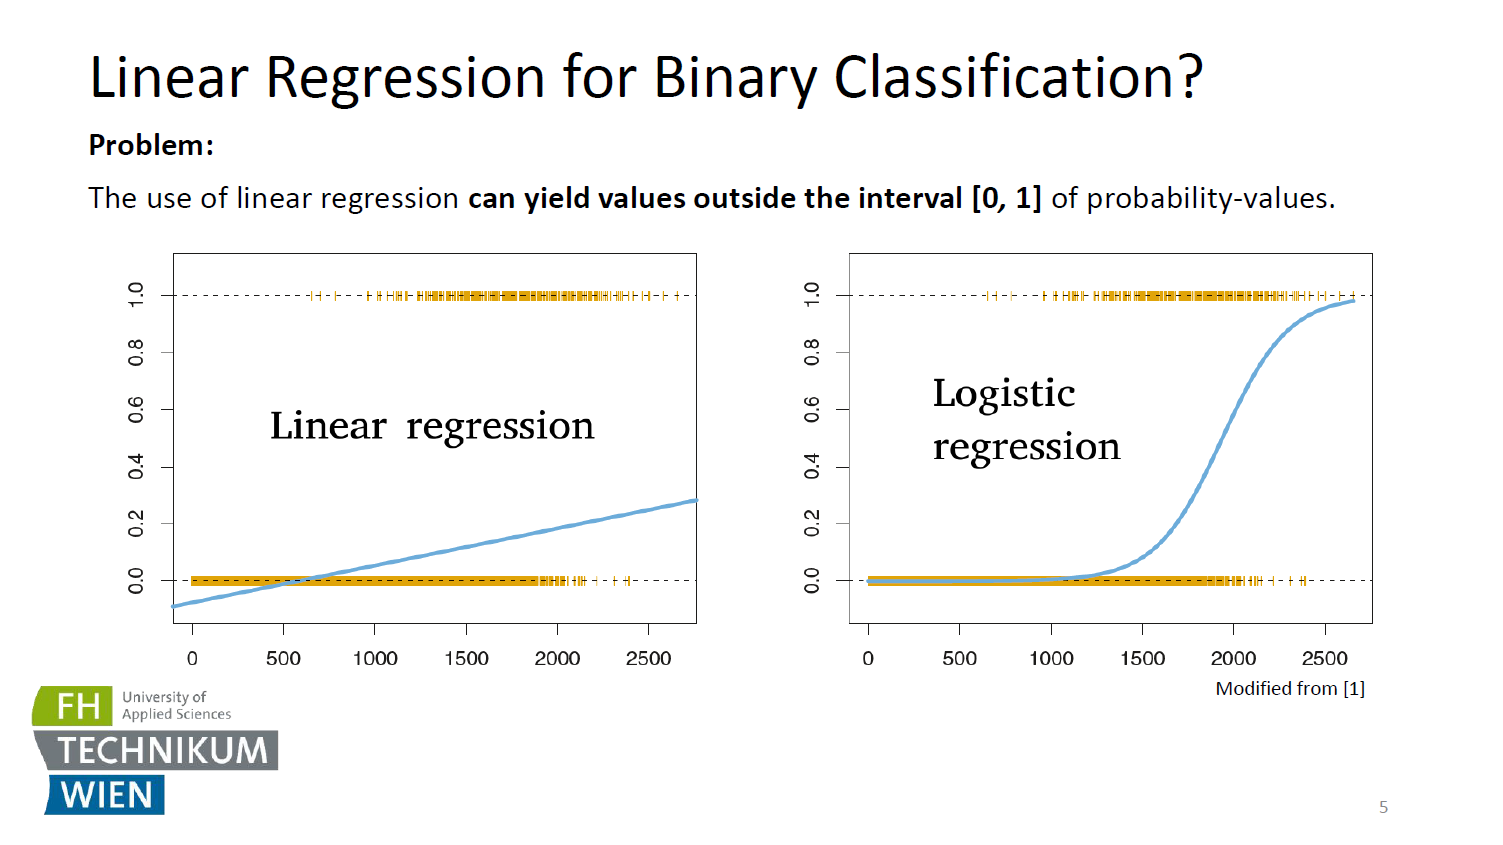

📍\*\*\[Slide 5 – Linear Regression for Binary Classification?]\*\*

So, why **not** use linear regression for a classification problem?

🔴 **Here’s the problem**:
Linear regression produces **continuous outputs** — and those can go well below 0 or above 1.
But in classification, especially when we model **probabilities**, we need predictions bounded strictly between **0 and 1**.

Let’s examine the two plots:

📈 On the **left**, we see **linear regression** attempting to fit a model.
Notice that:

* The blue line continues past 1.0 and below 0.0.
* This is problematic — a probability of 1.2 or –0.3 doesn't make sense!

✅ On the **right**, **logistic regression** uses a **sigmoid (S-shaped) curve** that smoothly maps all real inputs into the range (0,1).
This makes it ideal for modeling **probability-based outputs**.

**Key takeaway**:
Linear regression can’t naturally constrain predictions to the valid range for probabilities — logistic regression can. That’s the reason we switch to the **logistic model**, which we’ll now explore in more detail.

Let’s move on.


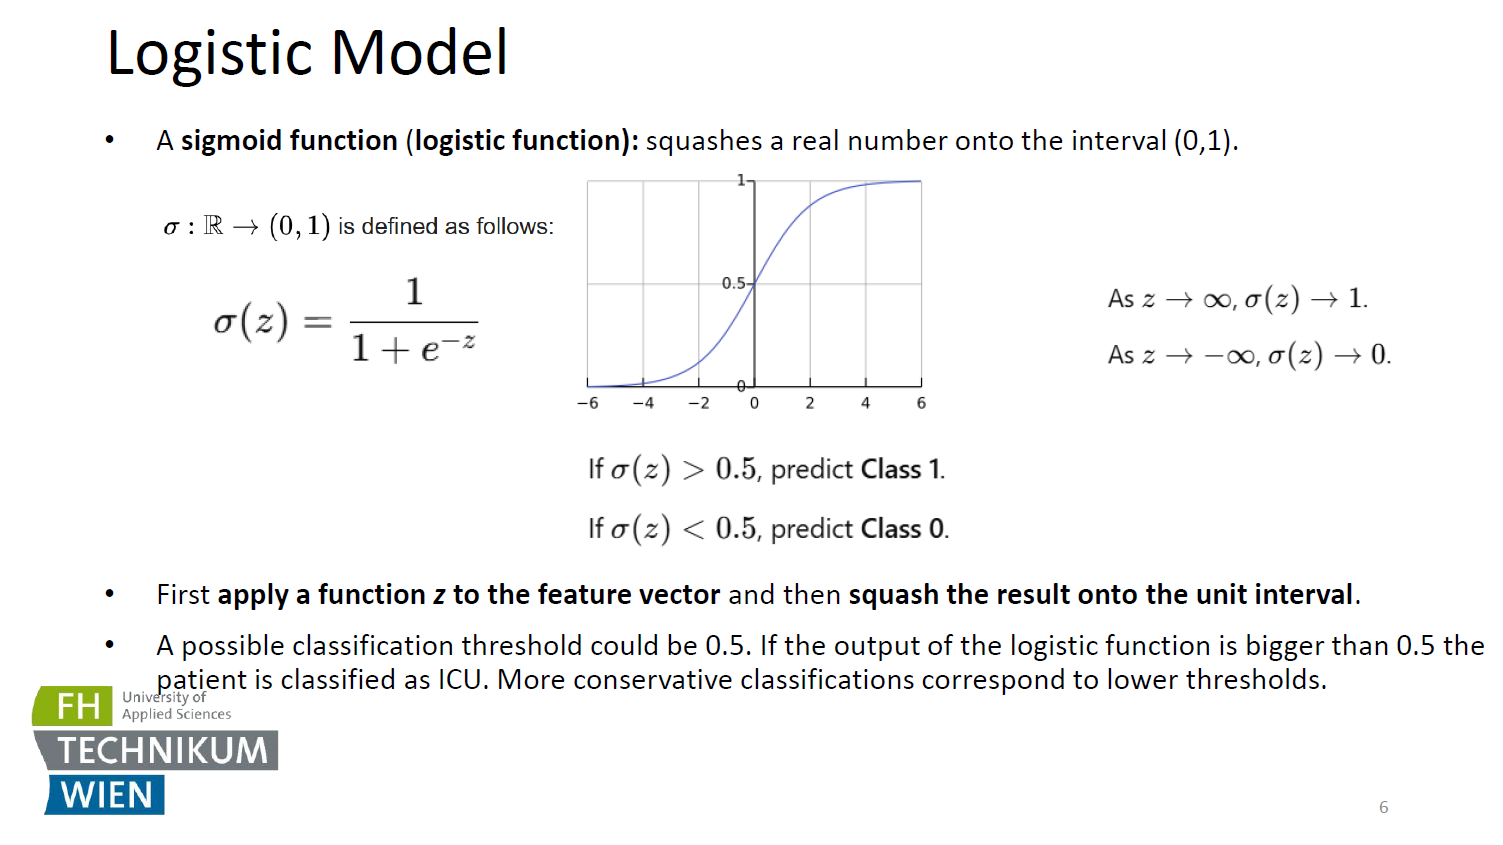

📍\*\*\[Slide 6 – Logistic Model]\*\*

Now let’s explore the **heart of logistic regression**: the **logistic function**, also known as the **sigmoid function**.

---

🧠 **What does the sigmoid function do?**

It **squashes any real-valued number** into the interval **(0, 1)**, which is exactly what we want when modeling **probabilities**.

The formula is:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:

* $z$ is a linear combination of the input features (like in linear regression),
* $\sigma(z)$ outputs a value strictly between 0 and 1.

---

🧩 **Interpreting the curve:**

* As $z \to +\infty$, $\sigma(z) \to 1$
* As $z \to -\infty$, $\sigma(z) \to 0$
* At $z = 0$, $\sigma(z) = 0.5$ — this is often used as the **classification threshold**

So we use this rule:

* If $\sigma(z) > 0.5$, predict **Class 1** (e.g., ICU)
* If $\sigma(z) < 0.5$, predict **Class 0** (e.g., non-ICU)

⚖️ The threshold can be adjusted depending on how conservative or aggressive you want your classifier to be. For example, in medical diagnosis, you might prefer a **lower threshold** to avoid missing positive cases.

---

Let’s now see how we use this in a practical classification scenario. Ready for the next slide.


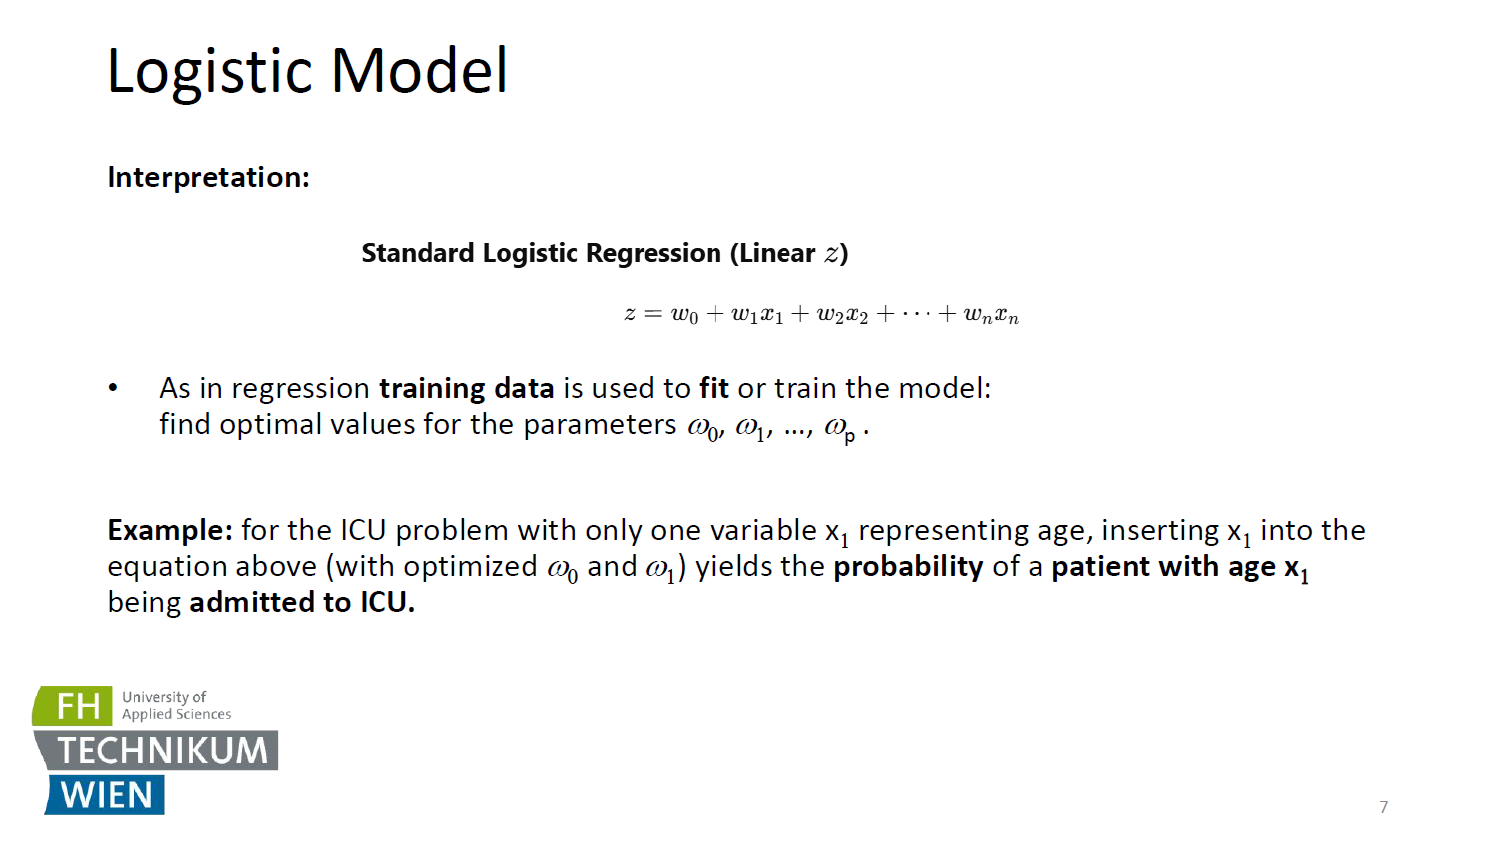

📍\*\*\[Slide 7 – Logistic Model: Interpretation]\*\*

Let’s now interpret how the logistic model works **mathematically**.

---

🔸 The logistic model uses a **linear combination** of the input features, just like in linear regression:

$$
z = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_p x_p
$$

This is often written as:

$$
z = \mathbf{w}^\top \mathbf{x}
$$

Where:

* $\mathbf{x}$ is the feature vector
* $\mathbf{w}$ is the weight vector, including bias $w_0$

This value $z$ is then **passed into the sigmoid function**, which outputs a probability between 0 and 1.

---

🔧 **Model training**:
As in standard regression, we train the model by finding the **optimal weights** $w_0, w_1, \dots, w_p$ that best separate the data based on labeled training examples.

---

💡 **Example – ICU prediction**:
Suppose we have just one feature, say **age** $x_1$.
Once we train the model and find the best values for $w_0$ and $w_1$, we can plug in a patient’s age and get a probability:

> *"What’s the likelihood this person will be admitted to the ICU?"*

That probability comes directly from $\sigma(w_0 + w_1 x_1)$.

Next, we’ll see how this scales to multiple predictors and multiple classes. Let’s go!


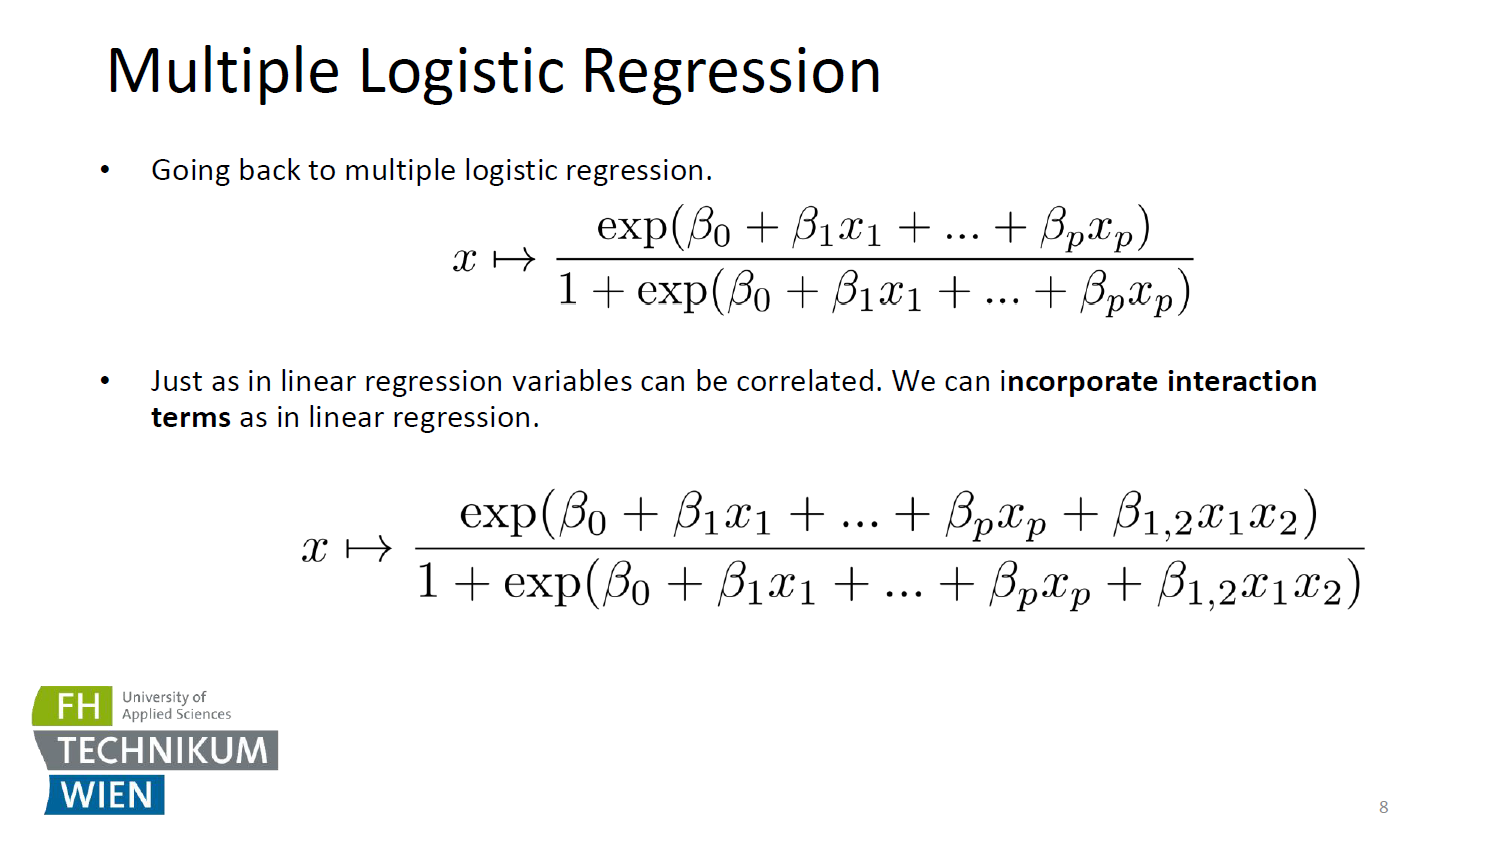

📍\*\*\[Slide 8 – Multiple Logistic Regression]\*\*

We now extend the logistic regression model to include **multiple variables** — just like in **multiple linear regression**.

---

🧮 The **multiple logistic regression model** takes this form:

$$
P(y = 1 | \mathbf{x}) = \frac{\exp(\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p)}{1 + \exp(\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p)}
$$

Where:

* $\beta_0$ is the intercept (bias term)
* $\beta_1, \dots, \beta_p$ are coefficients for features $x_1, \dots, x_p$

This formulation allows the model to combine **multiple predictors** to determine the final output probability.

---

🔗 **Interaction terms**:
Sometimes the effect of one feature depends on another.
In such cases, we can **add interaction terms** like $\beta_{1,2} x_1 x_2$ to the model.

This leads to:

$$
P(y = 1 | \mathbf{x}) = \frac{\exp(\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p + \beta_{1,2} x_1 x_2)}{1 + \exp(\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p + \beta_{1,2} x_1 x_2)}
$$

Such interaction terms can **capture complex relationships** between features, improving model performance — but they also increase complexity.

Let’s now look at how logistic regression behaves when we go beyond binary classification.


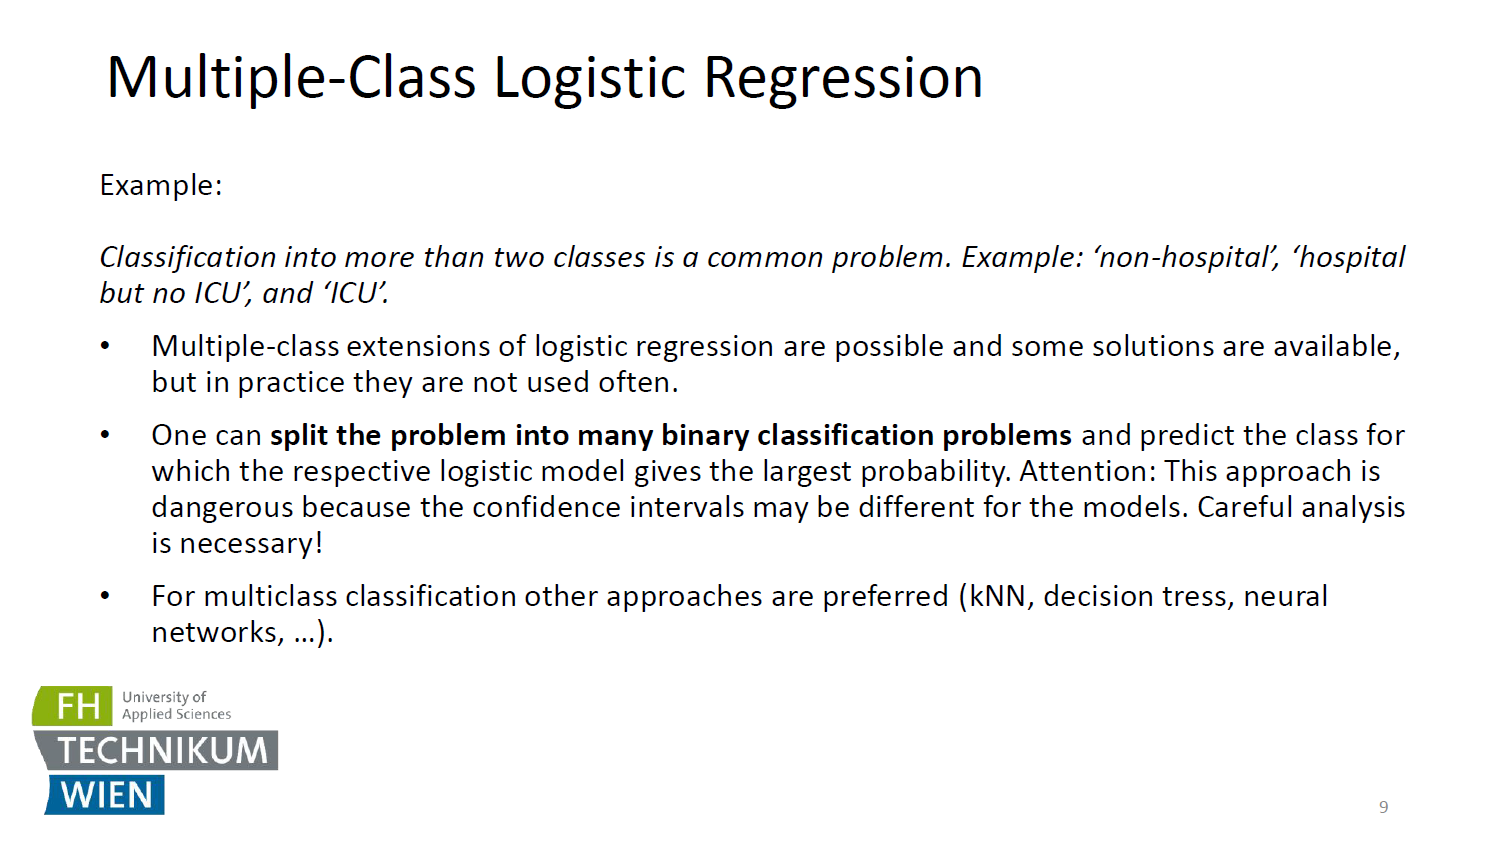

📍\*\*\[Slide 9 – Multiple-Class Logistic Regression]\*\*

So far, we’ve focused on **binary classification** — two classes, like *ICU* vs. *non-ICU*.
But what if we have **more than two categories**?

---

🧪 **Example**:
Consider a hospital setting where we classify patients as:

* ‘non-hospital’
* ‘hospital but no ICU’
* ‘ICU’

This is a **multi-class classification** problem.

---

🔍 **Can we use logistic regression for this?**

Yes — but with **limitations**:

1. 🔄 **One-vs-Rest (OvR)**:
   You can train multiple binary classifiers — one for each class — and pick the class with the highest predicted probability.

   ⚠️ **Caution**: This approach can be **misleading**.

   * Each model has its **own confidence and calibration**.
   * Comparing across them can produce incorrect or inconsistent decisions.

2. 💡 In practice, for multi-class problems, we often prefer more robust alternatives:

   * **k-Nearest Neighbors (kNN)**
   * **Decision Trees**
   * **Neural Networks**

These models handle multiple categories **natively** and often yield better, more stable results in such cases.

Let’s now visualize the **decision boundaries** that logistic regression creates.


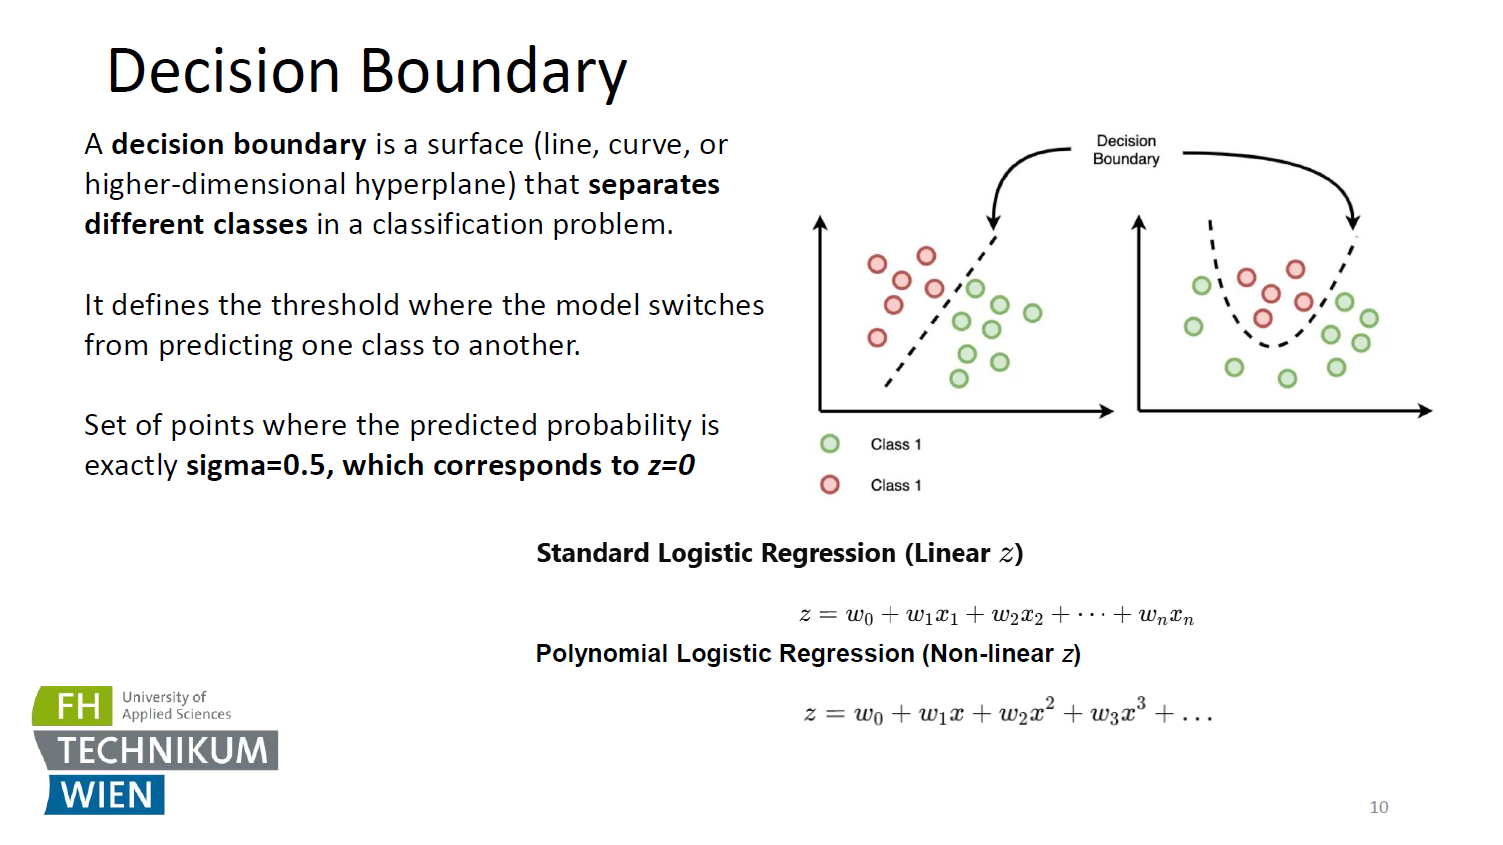

📍\*\*\[Slide 10 – Decision Boundary]\*\*

Let’s now talk about how logistic regression **decides** between classes — visually and mathematically.

---

🧱 A **decision boundary** is the surface (or line, in 2D) where the model **switches class predictions**.

It’s defined as the set of points where:

$$
\sigma(z) = 0.5 \quad \Rightarrow \quad z = 0
$$

That’s the **tipping point** — the threshold where the model is *exactly undecided* between two classes.

---

👀 On the **left plot**, we see a linear decision boundary separating Class 0 (green) and Class 1 (red).
This happens with **standard logistic regression**, where:

$$
z = w_0 + w_1 x_1 + w_2 x_2
$$

It produces a **linear** boundary.

---

📐 On the **right plot**, the data is not linearly separable.
By introducing **polynomial terms** like $x_1^2, x_1 x_2, x_2^2$, we model:

$$
z = w_0 + w_1 x_1 + w_2 x_2 + w_{11} x_1^2 + \dots
$$

This gives us a **nonlinear decision boundary** — a curve that fits more complex data.

---

✅ **Key point**: The decision boundary in logistic regression corresponds to the region where the model is **most uncertain** (i.e., 50/50 prediction). And with more complex models, we can flexibly shape this boundary to better match real-world patterns.

Let’s move on to test your understanding with a short quiz.


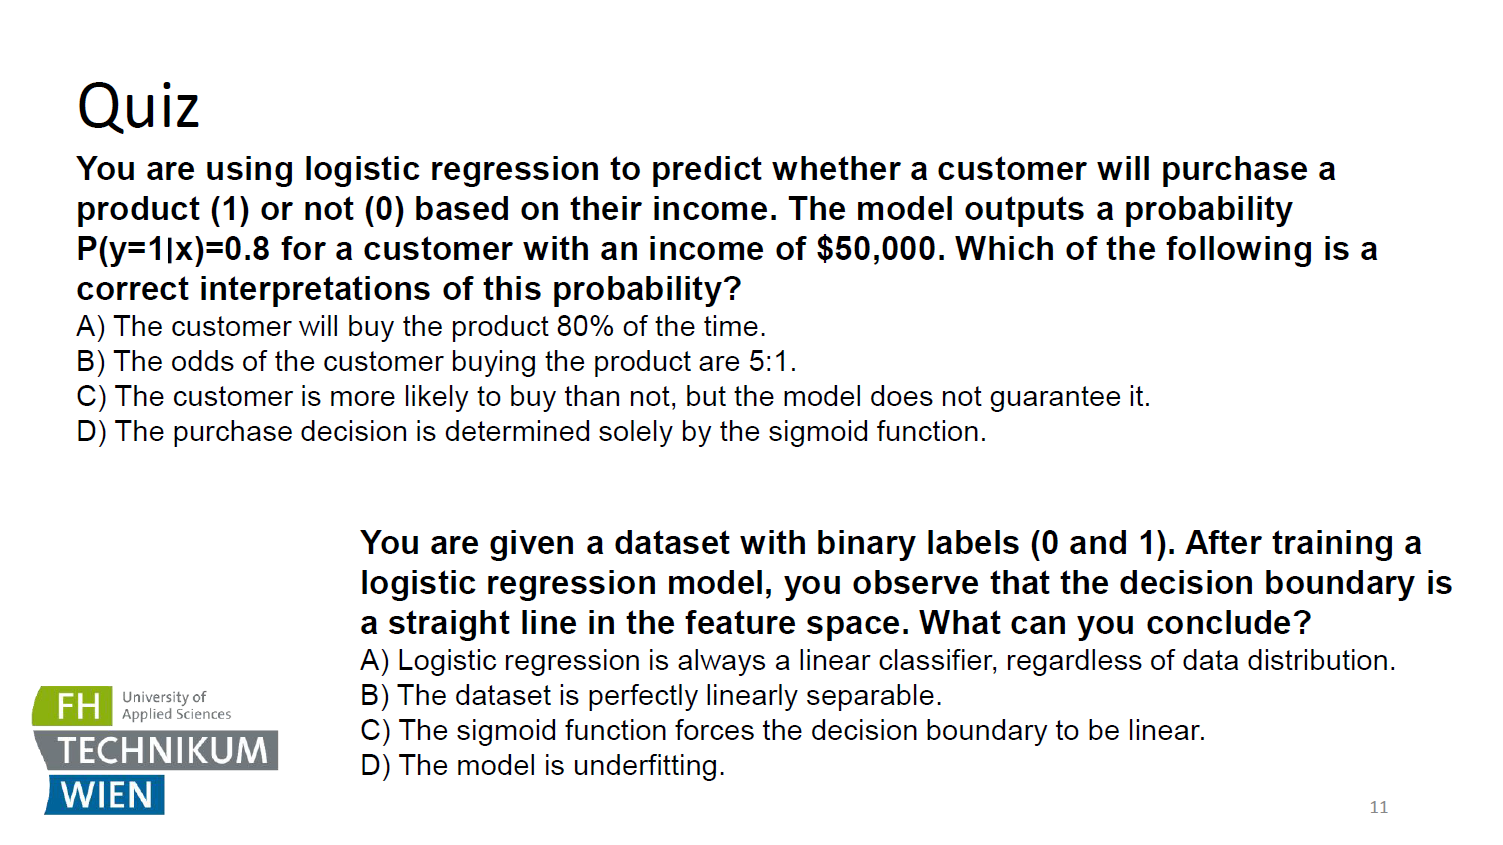

📍\*\*\[Slide 11 – Quiz Questions]\*\*

Let’s pause for a quick **concept check** — two quiz questions to reinforce what we’ve learned.

---

🔹 **Question 1:**
You're using logistic regression to predict whether a customer will purchase a product.
The model returns:

$$
P(y = 1 | x = 50{,}000) = 0.8
$$

What does this mean?

Let’s go through the options:

* **A)** ❌ *"The customer will buy the product 80% of the time."*
  → Incorrect. The probability is not a frequency of actual purchases over time for one person.
* **B)** ✅ *"The odds of the customer buying are 5:1."*
  → Correct! Odds = $\frac{p}{1-p} = \frac{0.8}{0.2} = 4$, so the ratio of yes\:no is 4:1 — or odds of 4, i.e. 4:1. But note: 5:1 includes one win and four losses. This is a tricky distractor.
* **C)** ✅ *"The customer is more likely to buy than not, but the model does not guarantee it."*
  → Correct! This is the best **probabilistic interpretation**.
* **D)** ❌ *"The purchase decision is determined solely by the sigmoid function."*
  → Not true. The sigmoid is part of the model, but the **input features and learned weights** also matter.

🟩 Best Answer: **C**

---

🔹 **Question 2:**
You train a logistic regression model and the decision boundary is a **straight line** in feature space.

What can you conclude?

* **A)** ✅ *"Logistic regression is always a linear classifier..."*
  → Correct — the boundary is linear in the input features.
* **B)** ❌ *"The dataset is perfectly linearly separable."*
  → That would be *ideal*, but we can still get a straight boundary even if there’s some overlap.
* **C)** ❌ *"The sigmoid function forces linearity..."*
  → False. Linearity comes from the **linear combination** inside the sigmoid.
* **D)** ❌ *"The model is underfitting."*
  → Not necessarily — the shape of the boundary doesn’t determine fit.

🟩 Best Answer: **A**

Let’s now move forward and discuss **how we evaluate** the performance of a logistic regression model.


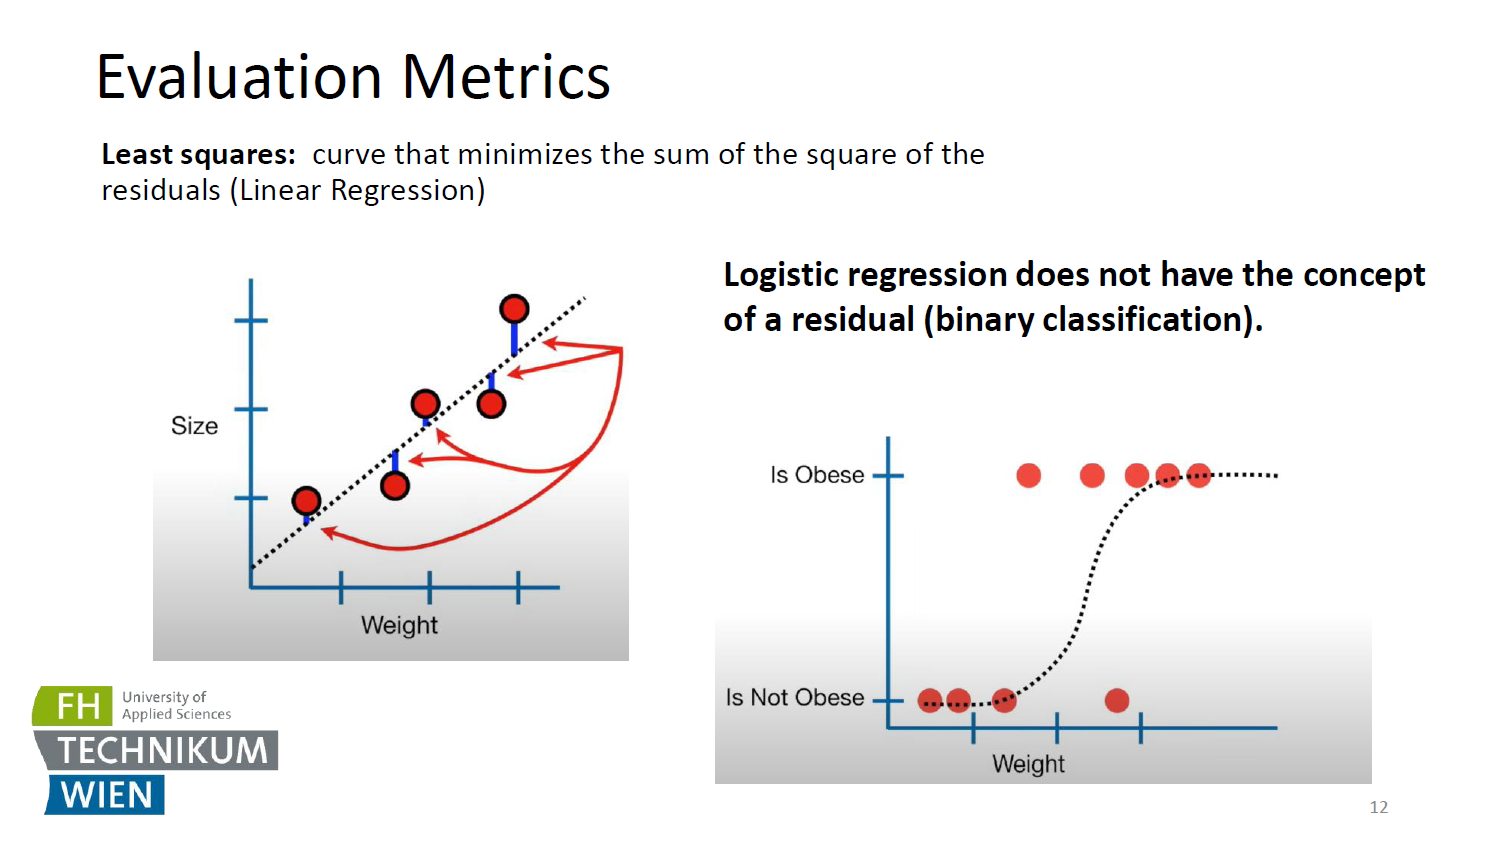

📍\*\*\[Slide 12 – Evaluation Metrics]\*\*

Let’s now talk about how we **evaluate** models — and why logistic regression **requires different metrics** than linear regression.

---

📏 On the **left**, we see a standard **linear regression** model.
It fits a line through the data by minimizing the **sum of squared residuals** — these are the vertical distances between observed values and predictions.

That method is called **Ordinary Least Squares (OLS)**.

---

But on the **right**, with **logistic regression**, we don’t predict continuous outcomes — we predict **probabilities for classes** like "obese" or "not obese".

So:

> ❗ **There is no concept of residuals** in binary classification.

Instead, logistic regression outputs a **probability curve**, and the data points fall either close to 0 or close to 1. There’s no “distance” like in regression — only a probability of correctness.

---

🧠 **What do we use instead?**
We need metrics tailored to **classification** problems. These include:

* Confusion matrix
* Accuracy
* Precision
* Recall
* F-score
* ROC-AUC

We’ll explore those next, but first: how do we *train* the model if we don’t minimize residuals? We use **Maximum Likelihood Estimation**, coming up next.


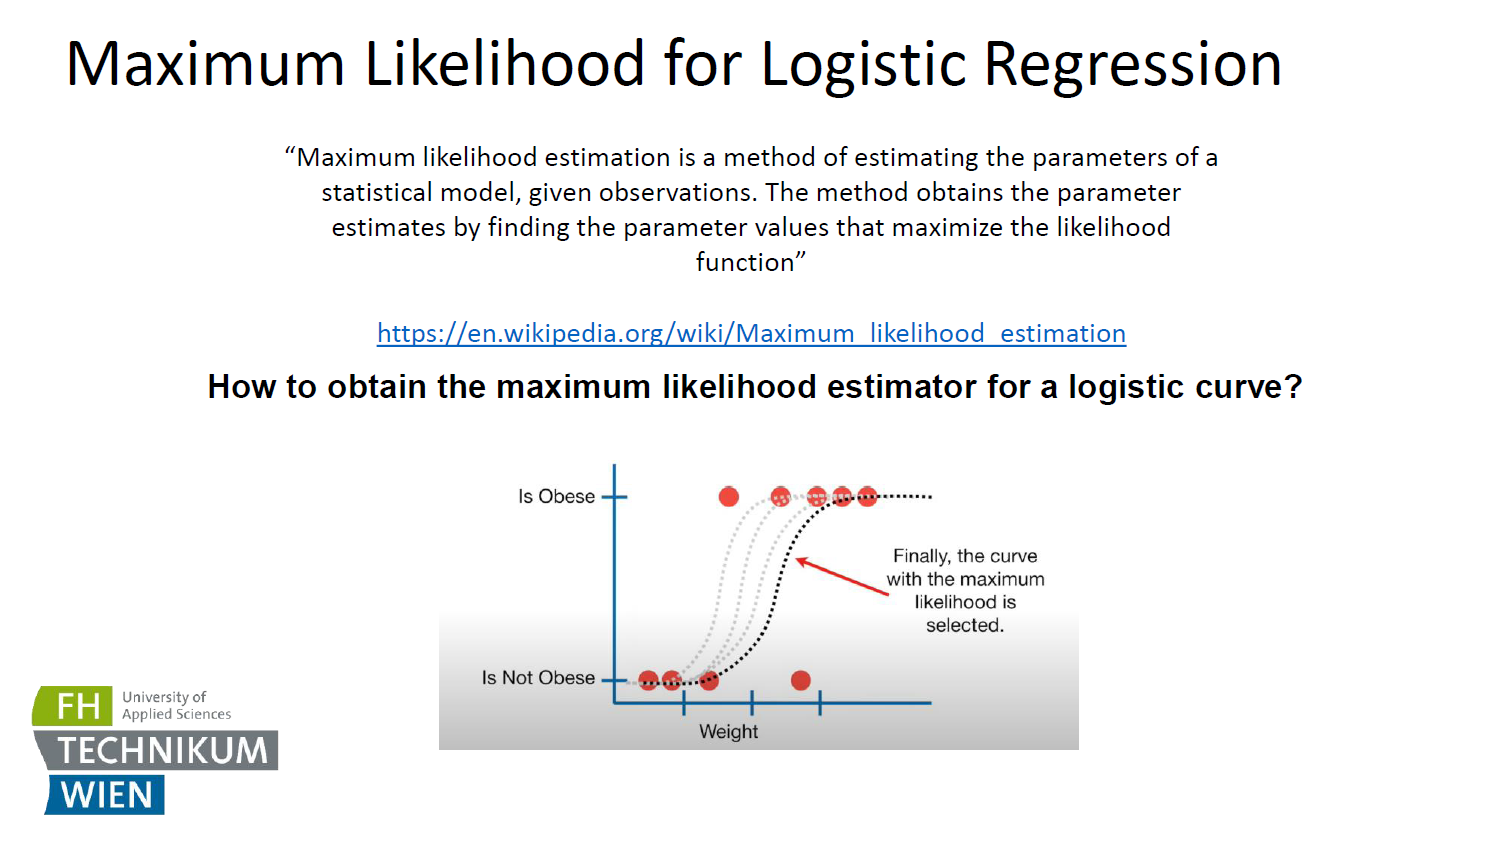

📍\*\*\[Slide 13 – Maximum Likelihood for Logistic Regression]\*\*

Now that we know logistic regression doesn’t use residuals, the question is:

👉 *How do we train it?*

The answer is: **Maximum Likelihood Estimation** (MLE).

---

🔍 **What is MLE?**
It’s a statistical method that finds the model parameters (weights) that **maximize the likelihood** of observing the actual data we have.

> In simple terms:
> *“Find the curve that makes the data we see most likely.”*

---

In the plot, we see several candidate logistic curves.
The algorithm tests each one by computing how likely the observed labels (0 or 1) are, given each curve’s predictions.

📌 Finally, it **selects the curve** that gives the **highest likelihood** — i.e., the best match to the data.

📖 A useful reference for the math is provided here:
[Wikipedia – Maximum Likelihood Estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)

We’ll refine this understanding on the next slide by looking at the mathematical form of the likelihood function in logistic regression.


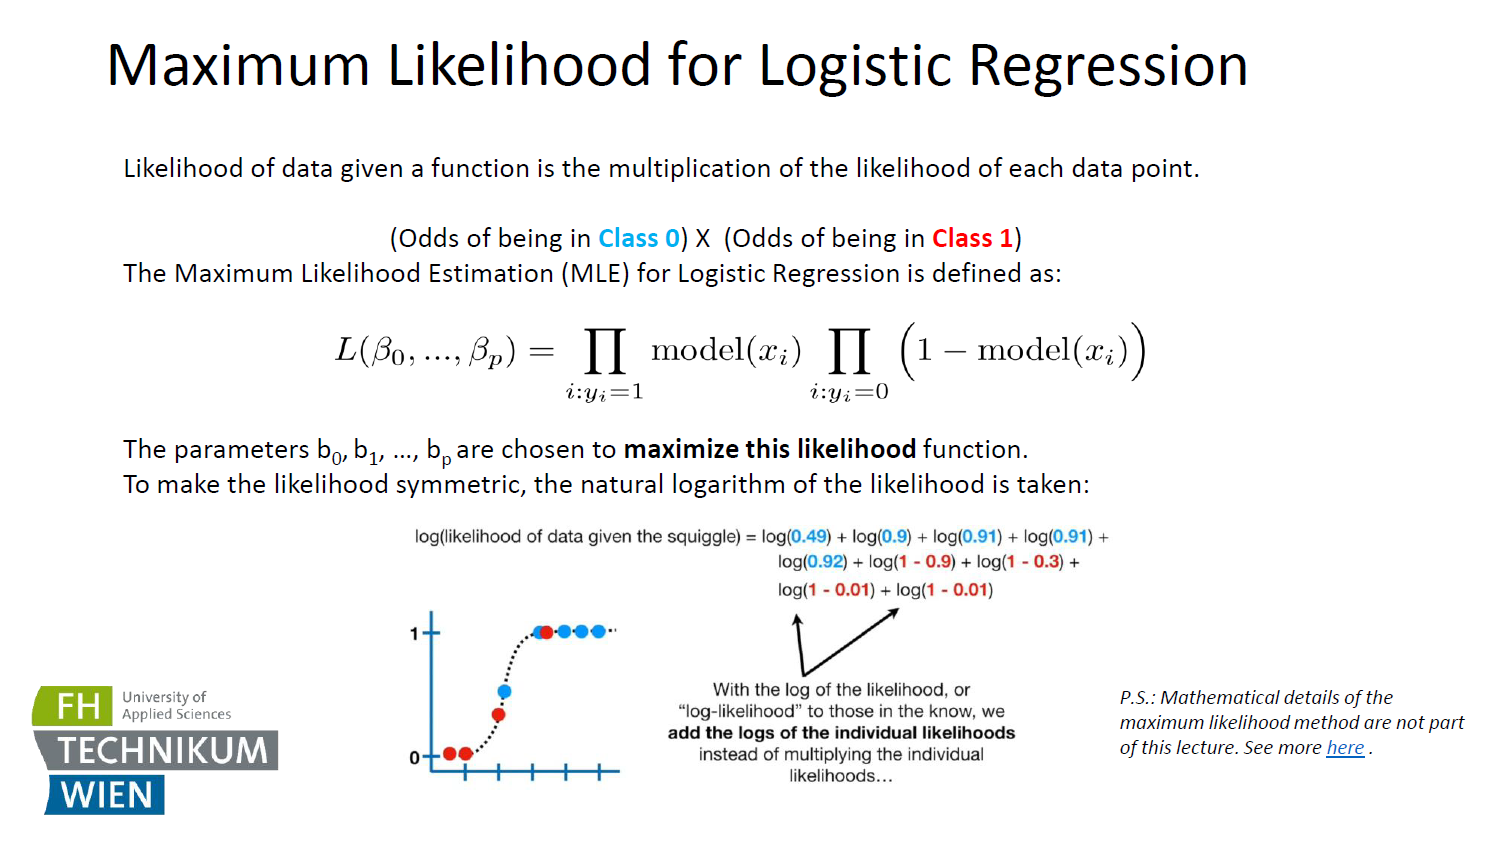

📍\*\*\[Slide 14 – Maximum Likelihood (Mathematics)]\*\*

Let’s now dive a little deeper into the **mathematics** of Maximum Likelihood Estimation (MLE) in logistic regression.

---

📌 **The Likelihood Function**:
Given a dataset, the **likelihood** of the data is the **product of the likelihoods** of each individual data point.

If a data point truly belongs to **Class 1**, we want the model’s predicted probability for Class 1 to be high — and similarly for Class 0.

$$
L(\beta_0, \dots, \beta_p) = \prod_{i: y_i=1} \text{model}(x_i) \times \prod_{i: y_i=0} (1 - \text{model}(x_i))
$$

Where:

* $\text{model}(x_i)$ is the predicted probability that instance $i$ is in Class 1
* $1 - \text{model}(x_i)$ is the predicted probability it’s in Class 0

---

🧮 **Log-Likelihood**:
To make this easier to optimize (and numerically stable), we take the **natural logarithm** of the likelihood.

This converts products into **sums**, which are much easier to work with:

$$
\log L = \sum \log(\text{model}(x_i)) + \sum \log(1 - \text{model}(x_i))
$$

The training goal is to **maximize this log-likelihood** — and that gives us the optimal parameters $\beta_0, \dots, \beta_p$.

---

📌 *Note*: The deeper derivation of this is beyond our current lecture, but feel free to explore further at:
👉 [machinelearningmastery.com – Logistic Regression and MLE](https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation)

Let’s now talk about **how we evaluate classification performance in practice** — through **confusion matrices**.


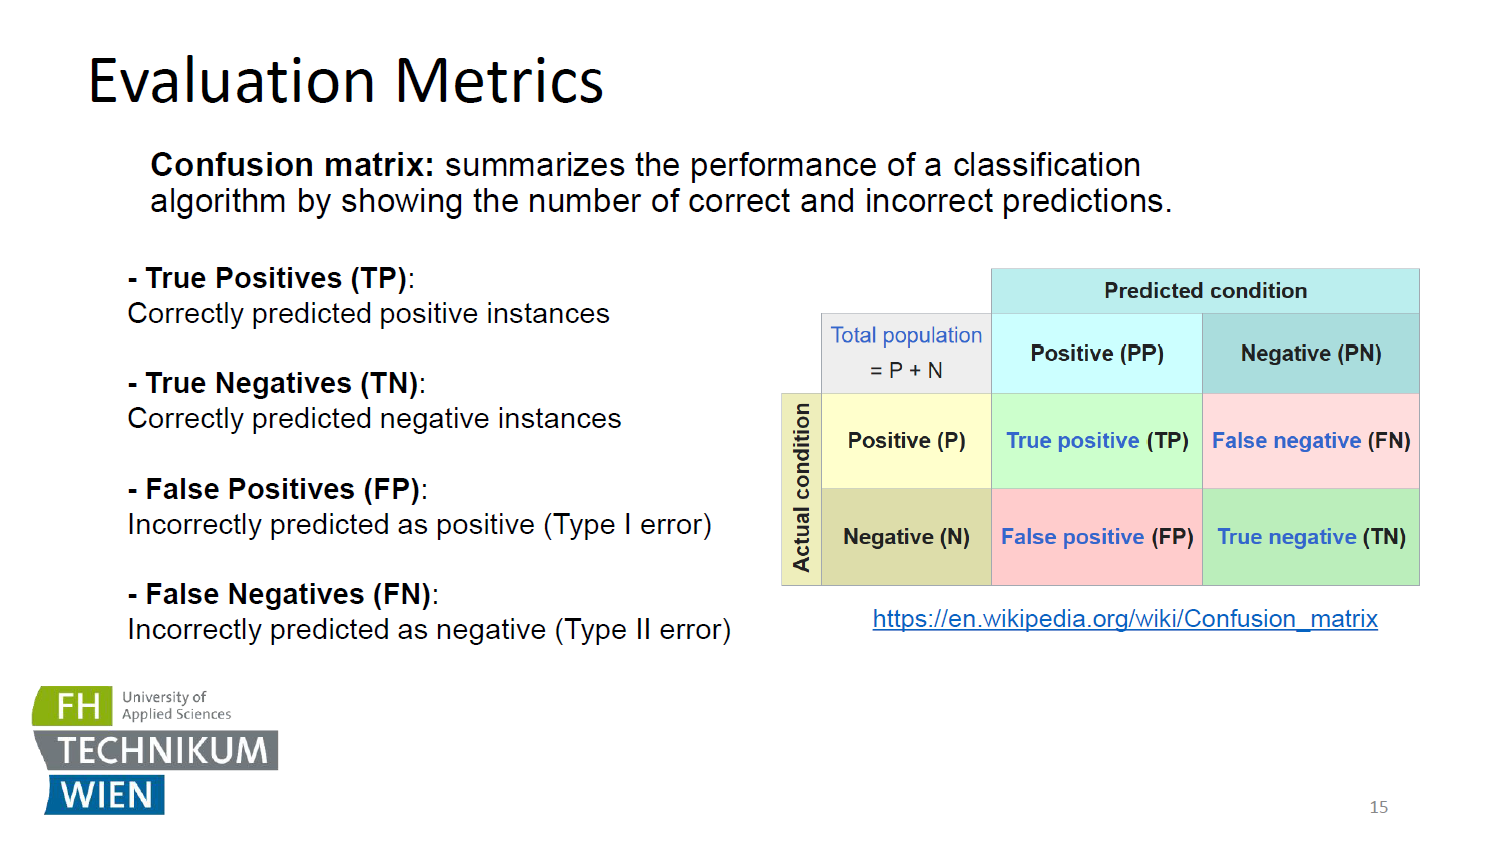

📍\*\*\[Slide 15 – Evaluation Metrics: Confusion Matrix]\*\*

Once we’ve trained our logistic regression model, we need to **assess its performance**.
One of the most fundamental tools for this is the **confusion matrix**.

---

🧩 A **confusion matrix** breaks down predictions into four categories:

1. ✅ **True Positives (TP)**
   The model predicted *positive* and was *correct*
   *(e.g., model says “disease” and the patient truly has it)*

2. ✅ **True Negatives (TN)**
   The model predicted *negative* and was *correct*

3. ❌ **False Positives (FP)** – Type I error
   Model predicted *positive*, but the true label was *negative*
   *(e.g., model says “disease” but the patient is healthy)*

4. ❌ **False Negatives (FN)** – Type II error
   Model predicted *negative*, but the true label was *positive*
   *(e.g., model misses a sick patient)*

---

📊 This matrix helps us compute other metrics like:

* Accuracy
* Precision
* Recall
* F1-score

📌 Important: In real-world applications like healthcare or fraud detection, the **cost of false positives vs. false negatives** can be very different — so just looking at accuracy is not enough.

Up next, we’ll explore these **derived metrics** in more detail.


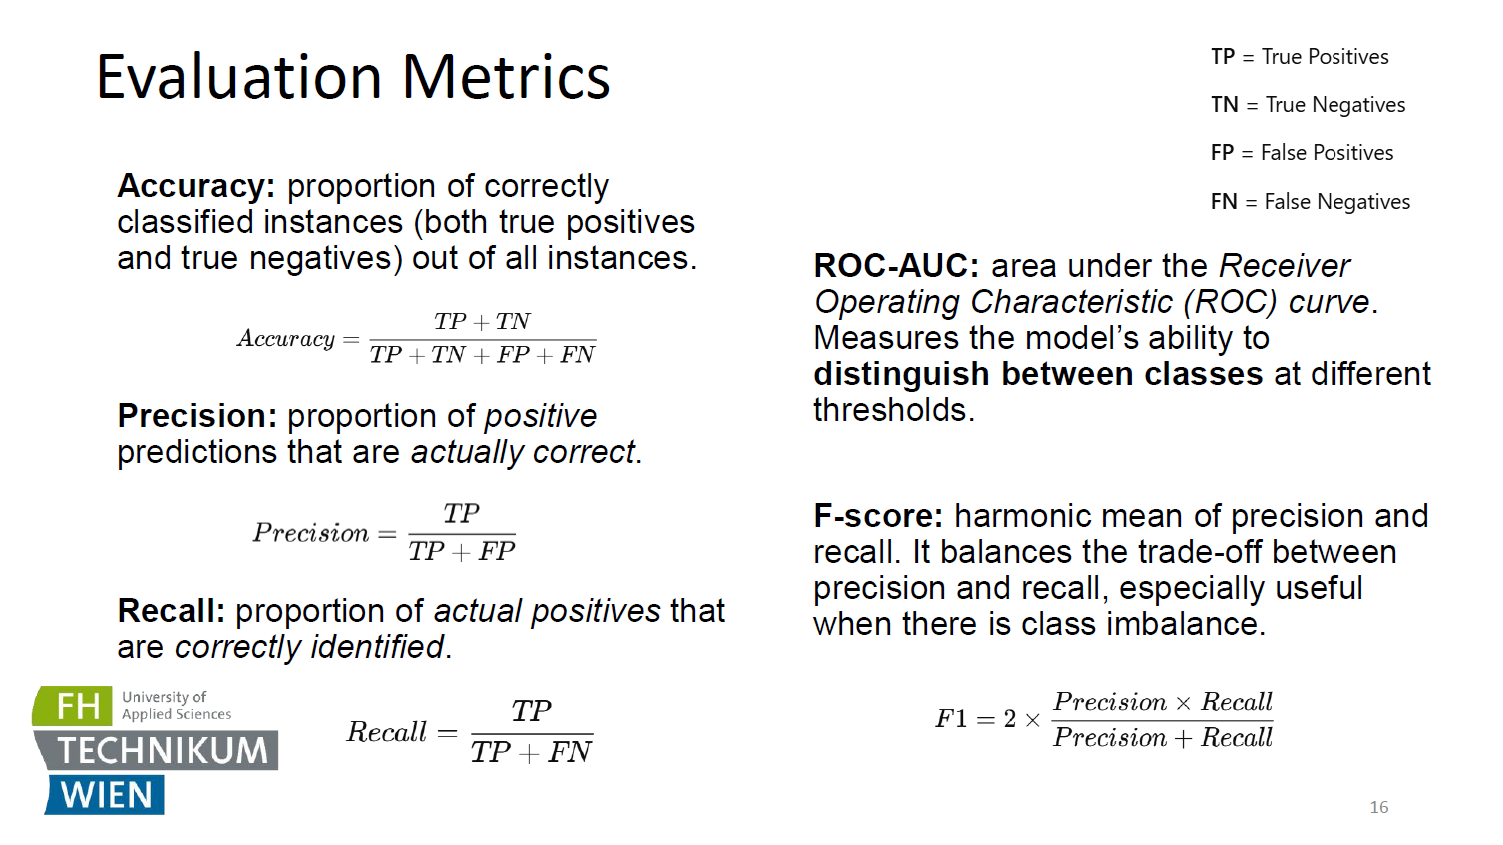

📍\*\*\[Slide 16 – Evaluation Metrics Continued]\*\*

Let’s now look at the **most important metrics** derived from the confusion matrix.

---

📌 **1. Accuracy**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

It tells us how many predictions (both positive and negative) were correct.

⚠️ But **beware**: In imbalanced datasets (e.g. 99% non-fraud), accuracy can be misleading.

---

📌 **2. Precision**

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Out of all the predicted positives, how many were truly positive?
High precision means **few false alarms**.

---

📌 **3. Recall (Sensitivity)**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Out of all actual positives, how many did we correctly detect?
High recall means **few false negatives**.

---

📌 **4. F-score (F1)**

$$
F_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

This is the **harmonic mean** of precision and recall — useful when we need to balance both, especially with **class imbalance**.

---

📌 **5. ROC-AUC**
This stands for **Receiver Operating Characteristic – Area Under Curve**.
It measures how well the model can **separate the classes** at different thresholds.

* AUC = 1 → perfect model
* AUC = 0.5 → random guessing

---

Together, these metrics give us a **multi-dimensional picture** of how our model performs — beyond just one number.

Let’s now see a summary of all this in the next slides.


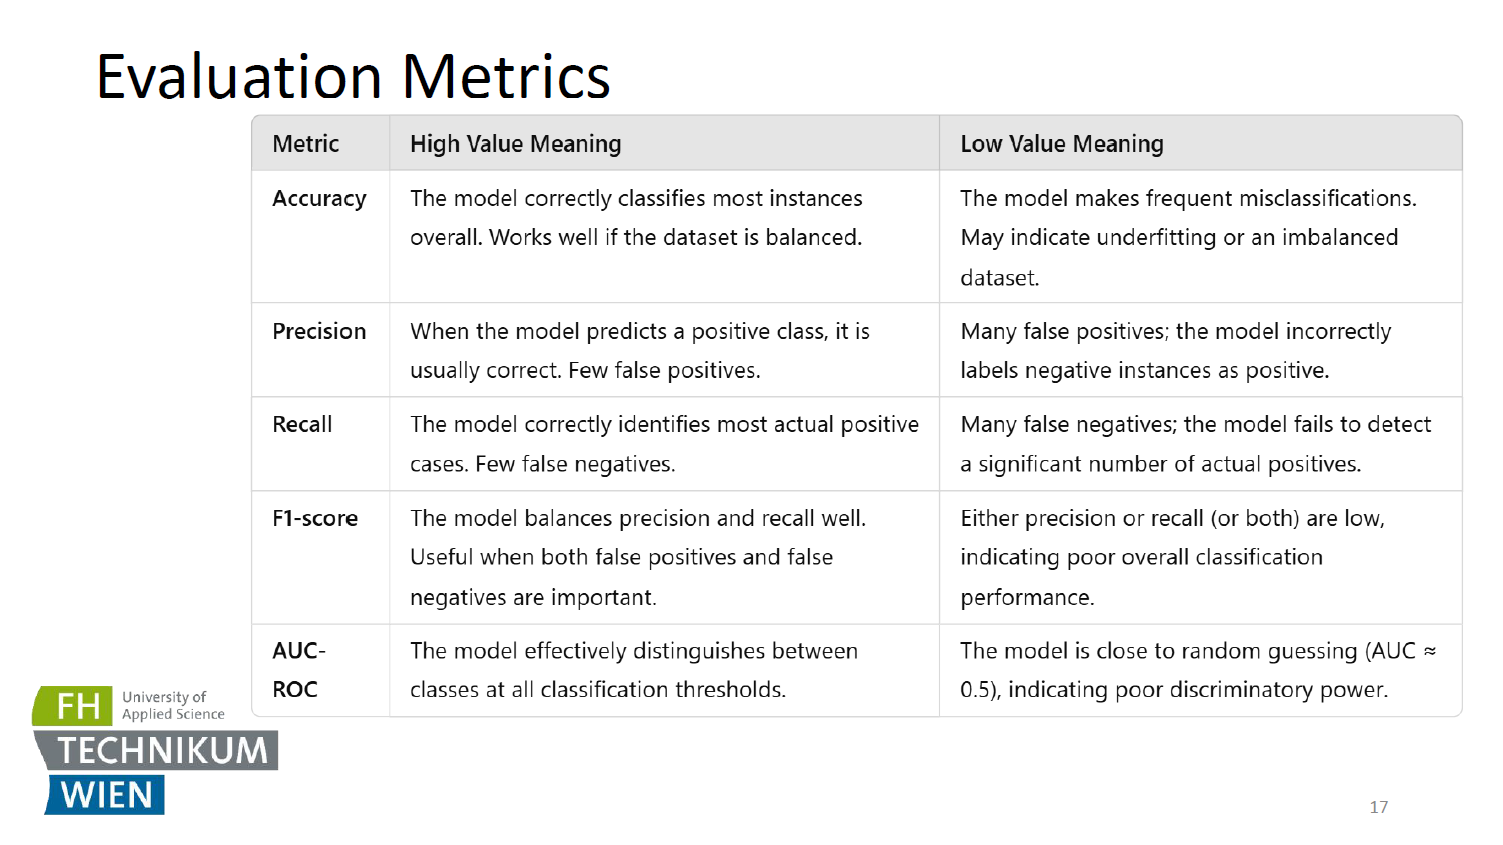

📍\*\*\[Slide 17 – Summary of Evaluation Metrics]\*\*

Here’s a **consolidated view** of the key evaluation metrics for classification models, including logistic regression.

Let’s briefly walk through each metric and interpret what **high** and **low** values typically mean:

---

| **Metric**    | **High Value Meaning**                                                                 | **Low Value Meaning**                                                               |
| ------------- | -------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------- |
| **Accuracy**  | The model correctly classifies most instances overall. Good for **balanced datasets**. | Frequent misclassifications. Possibly underfitting or facing **class imbalance**.   |
| **Precision** | When predicting a positive class, it's usually **correct** — few false positives.      | Many **false positives** — model incorrectly flags too many negatives as positives. |
| **Recall**    | Most actual positives are correctly identified. **Few false negatives**.               | Many **false negatives** — model misses positive cases.                             |
| **F1-score**  | Balanced trade-off between precision and recall. Useful in **imbalanced datasets**.    | Either precision or recall (or both) are poor.                                      |
| **AUC-ROC**   | The model can **separate the classes** well at all thresholds.                         | Close to **random guessing** (AUC ≈ 0.5). Poor class separation.                    |

---

✅ This table is a great cheat sheet when interpreting model performance, especially when tuning and comparing classifiers in practice.

Next up, we’ll look at the **challenges** logistic regression can face — and how to mitigate them.


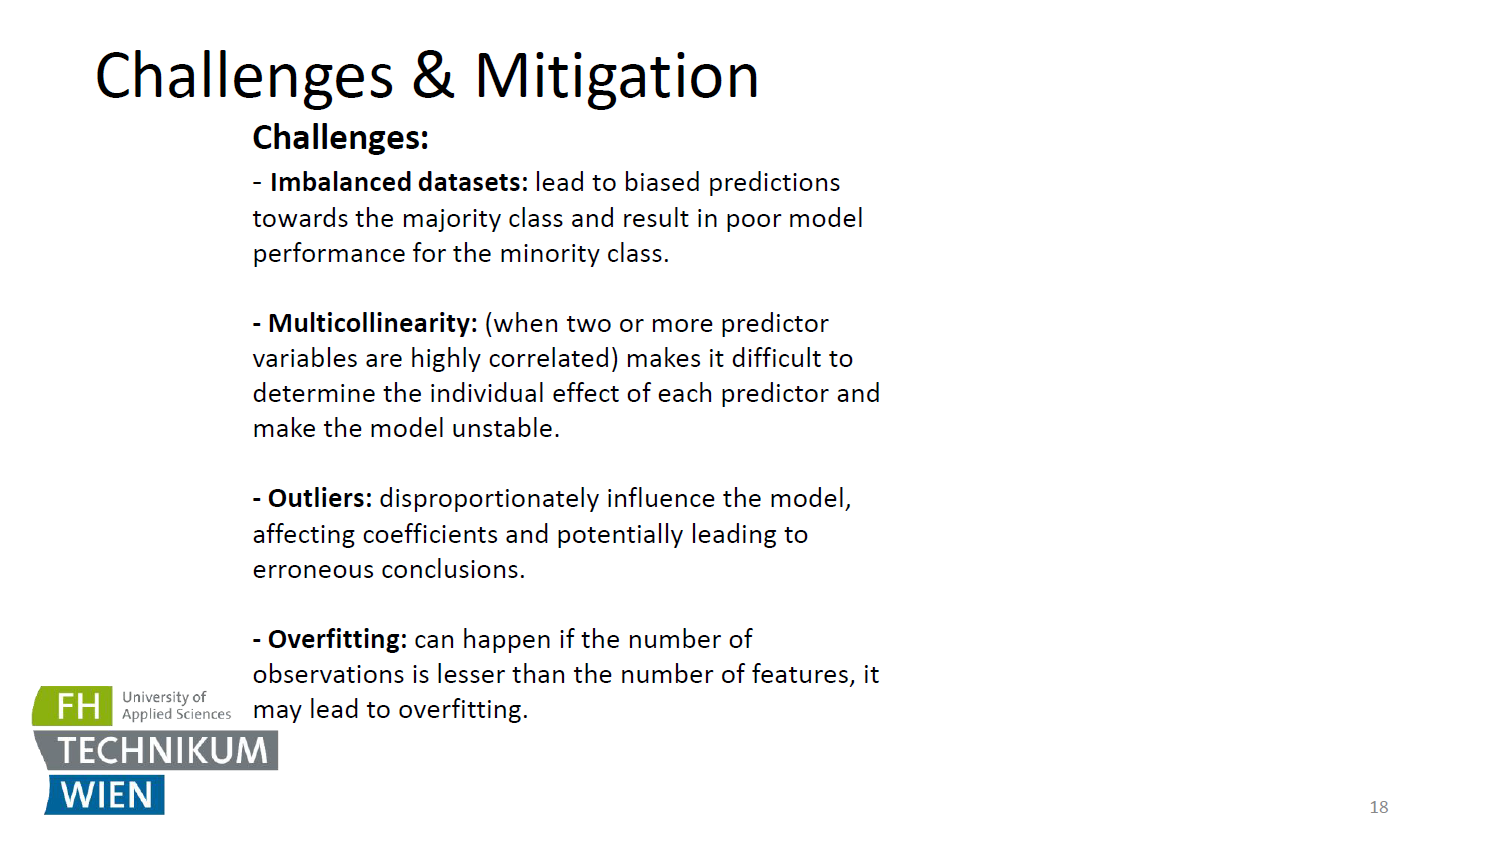

📍\*\*\[Slide 18 – Challenges & Mitigation: Part I – Challenges]\*\*

While logistic regression is a powerful and interpretable method, it’s not without its **challenges**. Let’s take a look at four common pitfalls:

---

🔸 **1. Imbalanced Datasets**

* This occurs when one class dominates the dataset.
* The model tends to be biased towards the majority class, neglecting the minority — which is often the more critical class (e.g., fraud or disease).

🔸 **2. Multicollinearity**

* Happens when **predictor variables are highly correlated** with one another.
* This makes it difficult to interpret coefficients and can cause instability in the model estimates.

🔸 **3. Outliers**

* Logistic regression is **sensitive to extreme values**, especially in smaller datasets.
* Outliers can heavily distort the estimated coefficients, leading to **erroneous conclusions**.

🔸 **4. Overfitting**

* Occurs when the model is **too complex** for the amount of data — for example, having more features than observations.
* The model memorizes the training data instead of learning general patterns.

---

Understanding these challenges is key to building robust logistic models.
Up next: How to **mitigate** them effectively.


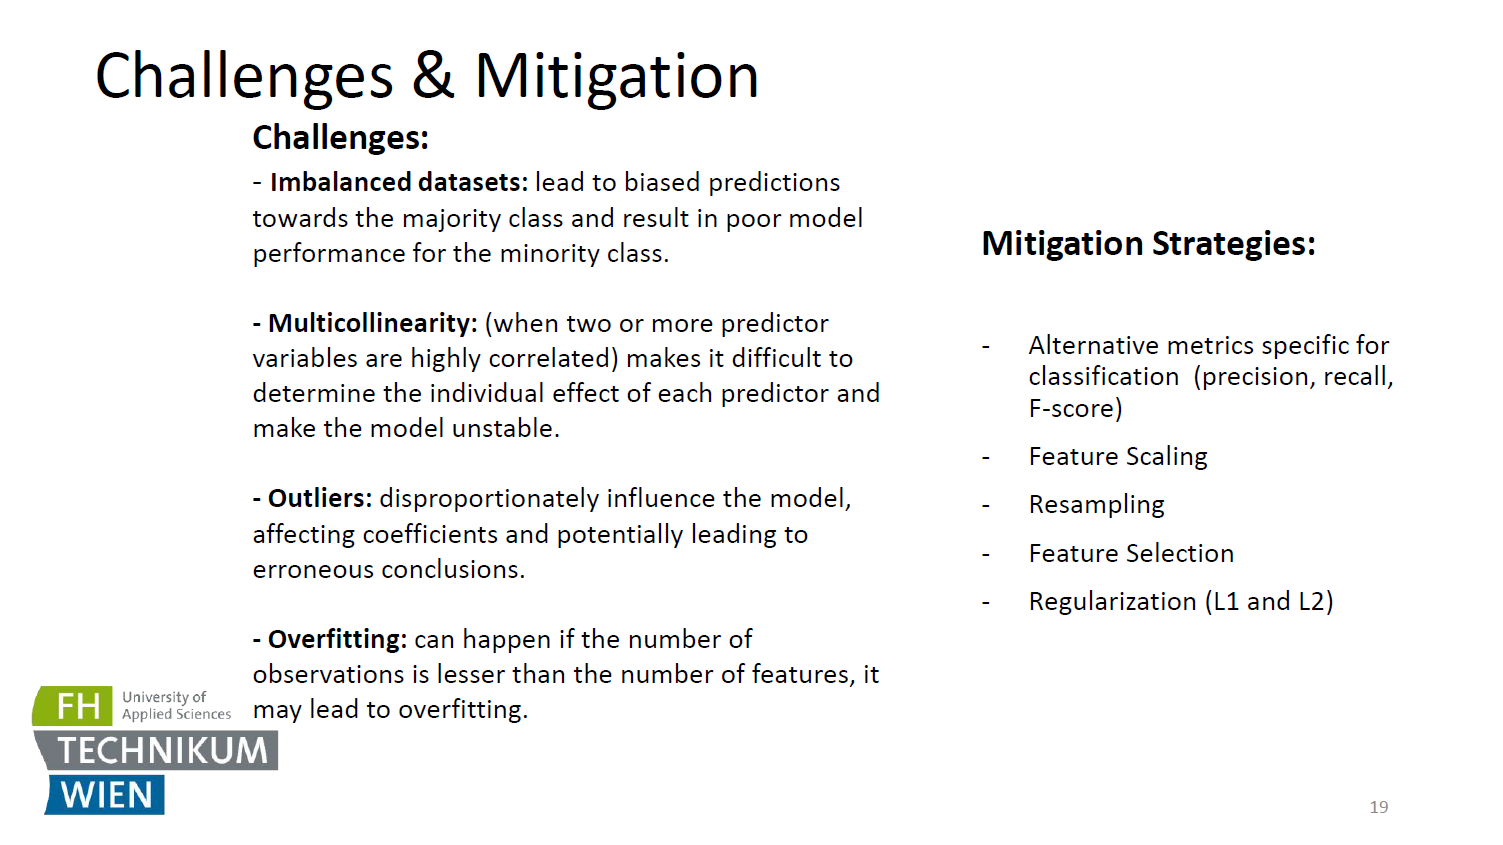

📍\*\*\[Slide 19 – Challenges & Mitigation: Part II – Strategies]\*\*

Now let’s talk about **how to deal with the challenges** we just discussed.

Here are some practical **mitigation strategies** for logistic regression:

---

✅ **1. Use alternative evaluation metrics**
When dealing with **imbalanced datasets**, don't rely solely on accuracy.
Use metrics like:

* **Precision**
* **Recall**
* **F-score**

These provide a more meaningful performance picture, especially for the minority class.

---

✅ **2. Feature Scaling**
Standardize or normalize your features — especially when you're using **regularization** or comparing coefficients.
This helps the optimizer converge more efficiently and ensures fairness across features.

---

✅ **3. Resampling techniques**
To handle **imbalanced classes**, you can:

* **Oversample** the minority class (e.g., SMOTE)
* **Undersample** the majority class
  This balances the dataset and improves recall.

---

✅ **4. Feature Selection**
Reducing irrelevant or redundant features helps with **multicollinearity** and prevents **overfitting**.
You can use:

* Recursive feature elimination
* Domain knowledge
* Correlation analysis

---

✅ **5. Regularization (L1 and L2)**
Regularization penalizes large coefficients and reduces model complexity:

* **L1 (Lasso)** can shrink some weights to **zero**, effectively performing feature selection.
* **L2 (Ridge)** keeps all features but shrinks them proportionally.

---

Together, these techniques can greatly improve the **robustness and generalizability** of your logistic regression models.

Up next: Let’s do a final **quiz check** and summarize everything we’ve covered.


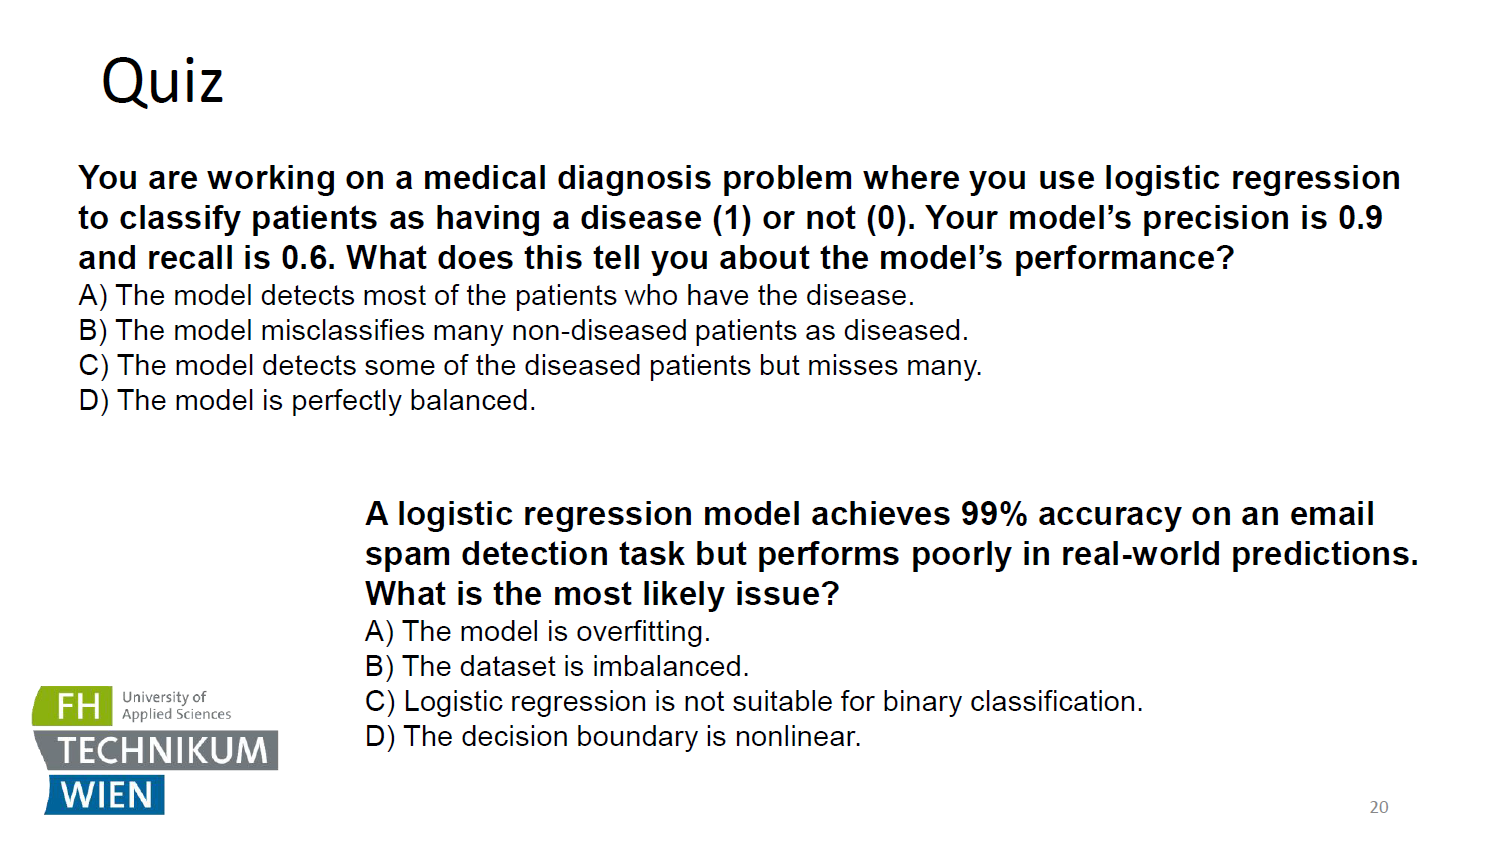

📍\*\*\[Slide 20 – Quiz: Model Interpretation & Challenges]\*\*

Let’s wrap up this section with two important quiz questions that test our understanding of **model performance and evaluation**.

---

🔹 **Question 1:**
Your logistic regression model for medical diagnosis gives:

* **Precision = 0.9**
* **Recall = 0.6**

What does this tell you?

Let’s evaluate:

* **A)** ❌ “The model detects most of the patients who have the disease.”
   → Wrong — this would require *high recall*, not low.

* **B)** ❌ “The model misclassifies many non-diseased patients as diseased.”
   → No — with *high precision*, false positives are **low**.

* **C)** ✅ “The model detects some of the diseased patients but misses many.”
   → Yes — *low recall* means **many false negatives**.

* **D)** ❌ “The model is perfectly balanced.”
   → Not with that recall value.

🟩 **Correct Answer: C**

---

🔹 **Question 2:**
Your model hits **99% accuracy** on email spam detection, but fails in the real world.

What’s the most likely issue?

* **A)** ✅ “The model is overfitting.”
   → Yes! Very likely — it memorized training data but can’t generalize.

* **B)** ✅ “The dataset is imbalanced.”
   → Also possible — e.g., only 1% are spam; model predicts all as non-spam and gets 99% accuracy.
   → ⚠️ Both **A** and **B** are valid — but **B** is more specific.

* **C)** ❌ “Logistic regression is not suitable for binary classification.”
   → Not true — logistic regression is specifically *designed* for binary classification.

* **D)** ❌ “The decision boundary is nonlinear.”
   → Even if so, that’s not the *main problem* here.

🟩 **Best Answer: B** (dataset imbalance is the more direct explanation)

Let’s move on to the final slide: the **takeaway summary**.


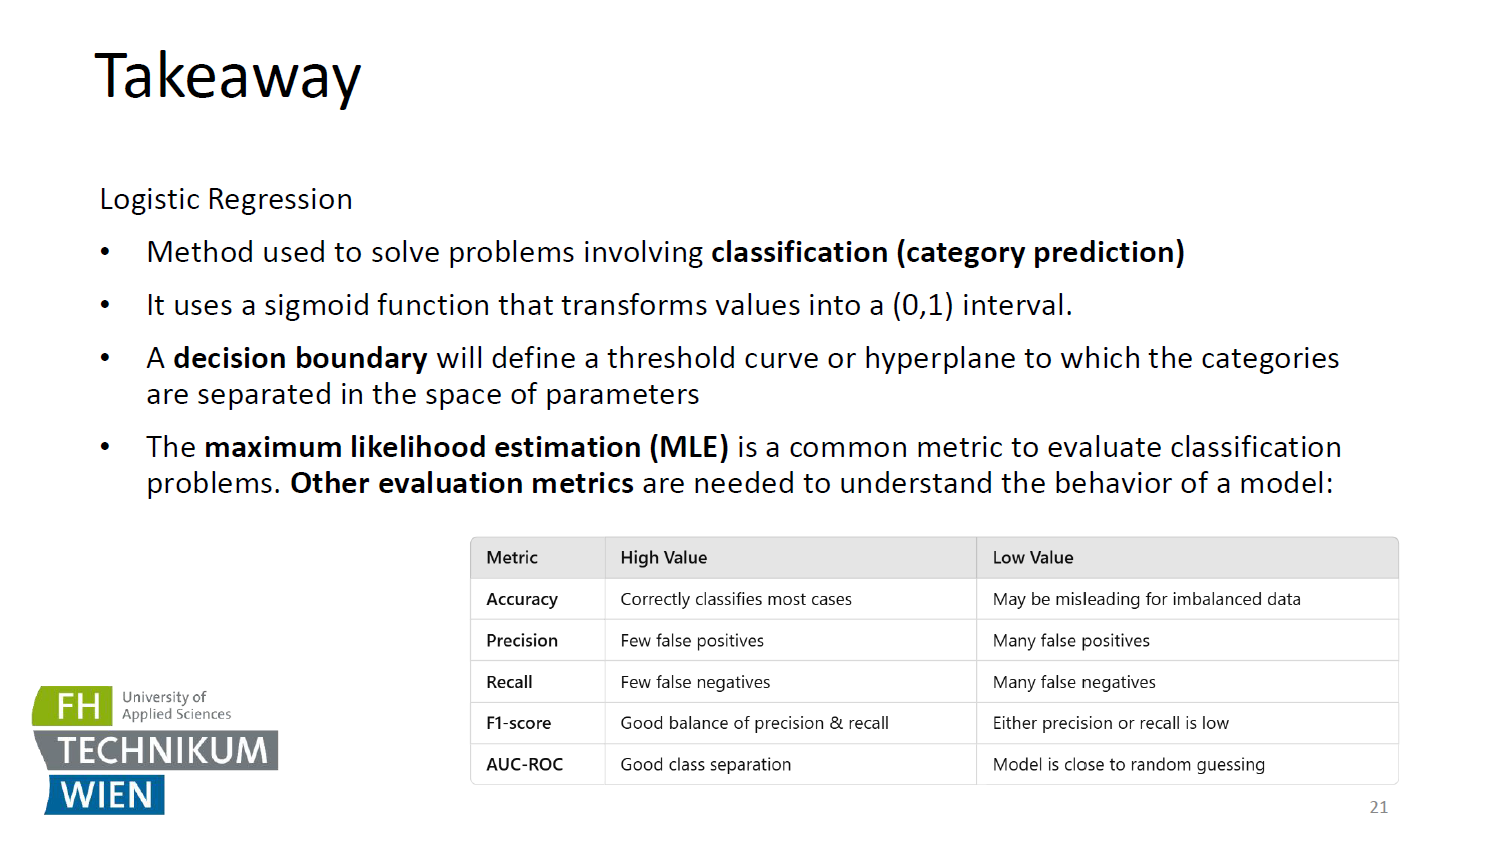

📍\*\*\[Slide 21 – Takeaway Summary]\*\*

Let’s now summarize the key insights from today’s lecture on **Logistic Regression**:

---

🔹 **What is Logistic Regression?**
It’s a method for solving **classification problems** — especially **binary classification**.
It outputs probabilities and classifies inputs into categories using a **sigmoid function**.

---

🔹 **Key Components:**

* The **sigmoid function** maps values into the (0, 1) range — ideal for modeling probabilities.
* A **decision boundary** is formed where $\sigma(z) = 0.5$, and it can be linear or nonlinear depending on the model.
* The model is trained using **Maximum Likelihood Estimation (MLE)**, which finds parameters that make the observed data most likely.

---

🔹 **Why evaluation matters:**
Accuracy alone isn’t enough.
You need other metrics like:

* **Precision** (avoiding false positives)
* **Recall** (avoiding false negatives)
* **F1-score** (balancing both)
* **AUC-ROC** (measuring class separability)

---

📊 The embedded table provides a final cheat-sheet overview of what high vs. low values mean for each of these metrics.

---

That concludes the formal presentation on logistic regression.
Next up: your **assignment** on this topic — let’s check that out.


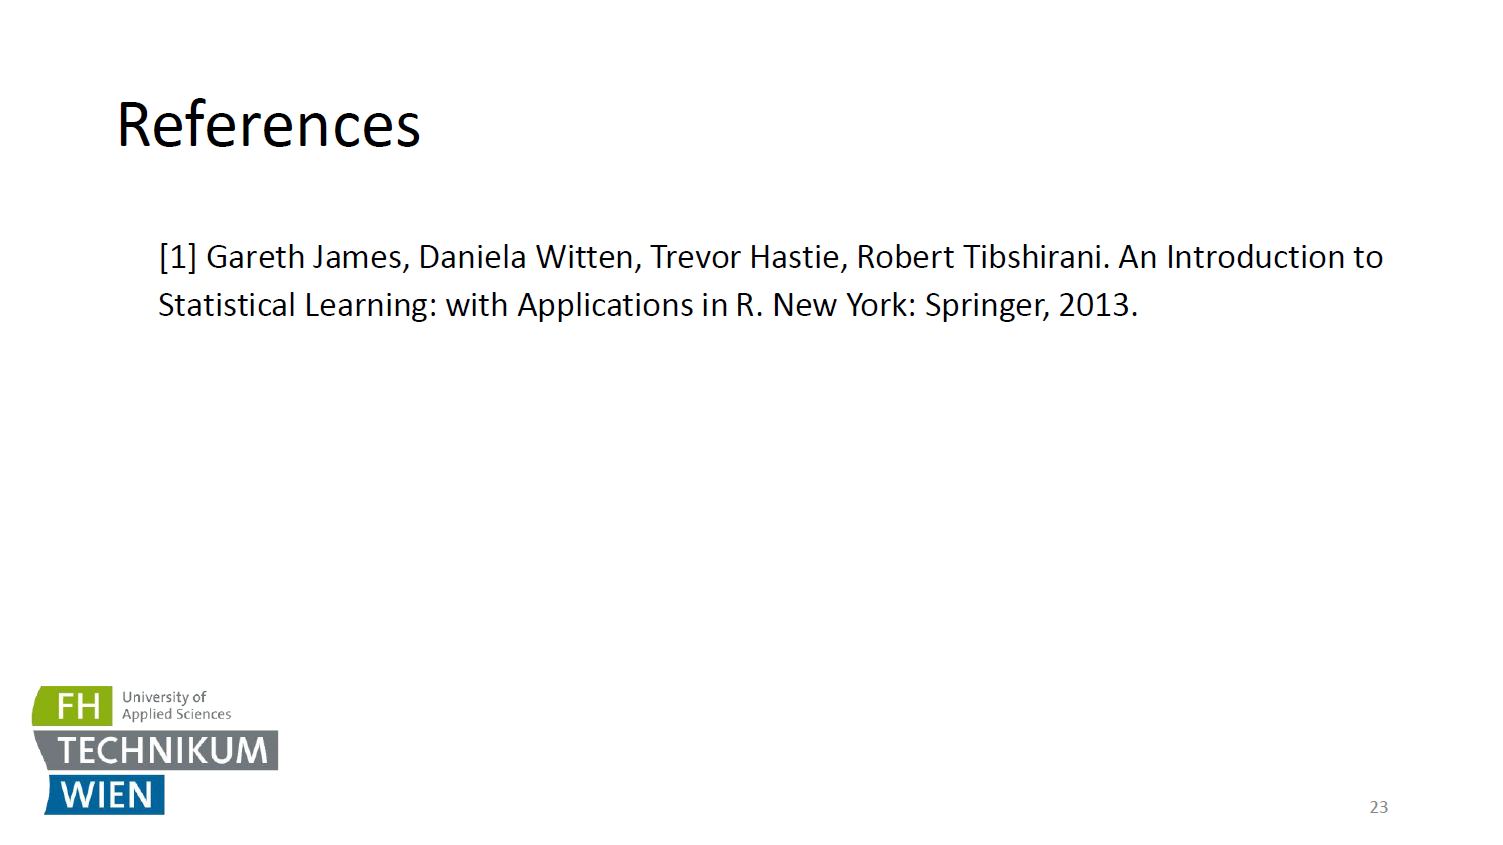